In [158]:
import pandas as pd
import pyspark.sql.functions as F
import pyspark.sql.types as T
from pyspark.sql.window import Window
import pickle

from glob import glob
from pyspark.sql import SparkSession
from tqdm import tqdm


In [159]:
spark = (
    SparkSession
    .builder
    .master("local[{}]".format(30))
    .config("spark.driver.memory", "{}g".format(90))
    .config("spark.driver.maxResultSize", f"{10}g")
    .getOrCreate()
)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
23/05/08 14:09:38 WARN Utils: Your hostname, achtung07 resolves to a loopback address: 127.0.0.1; using 192.168.2.7 instead (on interface enp65s0f0)
23/05/08 14:09:38 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/05/08 14:09:38 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/05/08 14:09:40 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/05/08 14:09:40 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
23/05/08 14:09:40 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.


In [3]:
!ls /net/data/twitter/gnip-data-david/json/

check_missing			     tweets.json.2020-06-07.xz
likes.json.2020-07-09.xz	     tweets.json.2020-06-08.xz
likes.json.2020-07-09.xz.bak	     tweets.json.2020-06-09.xz
likes.json.2020-07-10.xz	     tweets.json.2020-06-10.xz
likes.json.2020-07-11.xz	     tweets.json.2020-06-11.xz
likes.json.2020-07-12.xz	     tweets.json.2020-06-12.xz
likes.json.2020-07-13.xz	     tweets.json.2020-06-13.xz
likes.json.2020-07-14.xz	     tweets.json.2020-06-14.xz
likes.json.2020-07-15.xz	     tweets.json.2020-06-15.xz
likes.json.2020-07-16.xz	     tweets.json.2020-06-16.xz
likes.json.2020-07-17.xz	     tweets.json.2020-06-17.xz
likes.json.2020-07-18.xz	     tweets.json.2020-06-18.xz
likes.json.2020-07-19.xz	     tweets.json.2020-06-19.xz
likes.json.2020-07-20.xz	     tweets.json.2020-06-20.xz
likes.json.2020-07-21.xz	     tweets.json.2020-06-21.xz
likes.json.2020-07-22.xz	     tweets.json.2020-06-22.xz
likes.json.2020-07-23.xz	     tweets.json.2020-06-23.xz
likes.json.2020-07-24.xz	     tweets.json.2020-06-24.

In [1]:
import os

BASE_PATH = '/net/data/twitter/gnip-data-david/json/'
sample_path = os.path.join(BASE_PATH, 'tweets.json.2020-05-06.xz')

In [3]:
%time

import lzma
import json
import random
from tqdm import tqdm_notebook

path = os.path.join(BASE_PATH, 'likes.json.2020-07-09.xz')


with lzma.open(path, 'r') as f:
    content = f.readline().decode("utf-8")
    json_d = json.loads(content)
    print(json_d)
    

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs
{'id': 'b276e9b5b820ebb7173a1f2e75252465', 'created_at': 'Thu Jul 09 13:53:40 +0000 2020', 'timestamp_ms': 1594302820149, 'favorited_status': {'created_at': 'Thu Jul 09 00:11:15 +0000 2020', 'id': 1281018037668282373, 'id_str': '1281018037668282373', 'text': 'the show villain          the actual villain https://t.co/tnwjMkpWEA', 'display_text_range': [0, 44], 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1106443132395241472, 'id_str': '1106443132395241472', 'name': 'erica', 'screen_name': 'jezra1798', 'location': 'she/they', 'url': 'http://bit.ly/degrowthpoc', 'description': 'korean eco-socialist #degrowth', 'translator_type': 'none', 'derived': {'locations': [{'country': 'Sri Lank

In [18]:
%time

import lzma
import json
import random
from tqdm import tqdm_notebook

users = []

with lzma.open(sample_path, 'r') as f:
    for i in tqdm_notebook(range(10000000)):
        
        content = f.readline().decode("utf-8")
        json_d = json.loads(content)
        if json_d['lang'] == 'fa' :#and 'quoted_status' in json_d and 'retweeted_status' in json_d:
            print(json_d)
    
    


CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.11 µs


/tmp/ipykernel_3278346/4161151305.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(10000000)):


  0%|          | 0/10000000 [00:00<?, ?it/s]

{'created_at': 'Wed May 06 15:11:36 +0000 2020', 'id': 1258051796028796928, 'id_str': '1258051796028796928', 'text': 'RT @famil2r: حواست هست! به موهای سفید سرم\nچقدر امسال از گذشته شکسته ترم\nحواست هست! نوکرت داره پیر میشه\nبخرم ببرم به حرم داره دیر میشه https…', 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 882268227023319040, 'id_str': '882268227023319040', 'name': '🚩عمار اَشتر 🇮🇷', 'screen_name': 'amare_ashtar', 'location': 'جبهه انقلاب اسلامی', 'url': None, 'description': '\u200f\u200f\u200f\u200f\u200f\u200f\u200f\u200f\u200f\u200fدانشجو، ایرانی ،انقلابی ، عاشق \u200e\u200e\u200e\u200e\u200e#امام_خامنه_ای ،پشتیبان \u200e\u200e\u200e\u200e\u200e#ولایت_فقیه،بیزار از پیروان رجوی و آتئیست و سلطنت طلب(⚠️👈🏻بک در صورت صلاحدید👉🏻⚠️)', 'translator

{'created_at': 'Wed May 06 15:11:29 +0000 2020', 'id': 1258051768782589953, 'id_str': '1258051768782589953', 'text': '@Fizakhan__7 تسی😍😂', 'display_text_range': [13, 18], 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': 1258050387950612480, 'in_reply_to_status_id_str': '1258050387950612480', 'in_reply_to_user_id': 1111673704289832960, 'in_reply_to_user_id_str': '1111673704289832960', 'in_reply_to_screen_name': 'Fizakhan__7', 'user': {'id': 1164969924726525952, 'id_str': '1164969924726525952', 'name': 'Haris Khan', 'screen_name': 'HarisIks', 'location': 'Dont Know....', 'url': None, 'description': 'If You Are BAD So I Am Your DAD🤘', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 3926, 'friends_count': 2699, 'listed_count': 0, 'favourites_count': 17759, 'statuses_count': 36132, 'created_at': 'Fri Aug 23 18:38:53 +0000 2019', 'utc_offset': None, 'time_zone': 

{'created_at': 'Wed May 06 15:11:49 +0000 2020', 'id': 1258051851397799936, 'id_str': '1258051851397799936', 'text': '@Farn_ نمیدونم به چه روشی اینقدر سریع لاغر کرده ولی دقیقا همین که گفتی صورتش خیلی لاغر شده از ریخت افتاده', 'display_text_range': [7, 105], 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': False, 'in_reply_to_status_id': 1258051223221043201, 'in_reply_to_status_id_str': '1258051223221043201', 'in_reply_to_user_id': 1828222824, 'in_reply_to_user_id_str': '1828222824', 'in_reply_to_screen_name': 'Farn_', 'user': {'id': 829109497834635264, 'id_str': '829109497834635264', 'name': 'Sina_mersault', 'screen_name': 'Sina_mersault', 'location': 'Torino', 'url': 'https://www.instagram.com/sinatango/', 'description': '\u200f\u200f\u200f\u200f\u200f\u200f\u200f\u200f\u200f\u200f\u200f\u200f\u200f\u200f\u200f\u200f\u200f\u200f\u200f\u200f\u200f\u200f\u200f\u200f\u200f\u200f\u200f\u200f\u200f\u200f\u200f\u200f\u200f\u200f\u200f\u200f\u

{'created_at': 'Wed May 06 15:11:54 +0000 2020', 'id': 1258051873615024130, 'id_str': '1258051873615024130', 'text': 'دید می\u200cزنه https://t.co/jrsvUrzC7L', 'display_text_range': [0, 10], 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 47053989, 'id_str': '47053989', 'name': 'آنا', 'screen_name': 'bastanichoobi', 'location': 'Germany', 'url': None, 'description': 'not Sane anymore', 'translator_type': 'none', 'derived': {'locations': [{'country': 'Germany', 'country_code': 'DE', 'full_name': 'Germany', 'geo': {'coordinates': [10.5, 51.5], 'type': 'point'}}]}, 'protected': False, 'verified': False, 'followers_count': 4132, 'friends_count': 795, 'listed_count': 41, 'favourites_count': 53025, 'statuses_count': 38379, 'created_at': 'Sun Jun 14 0

{'created_at': 'Wed May 06 15:12:06 +0000 2020', 'id': 1258051923128827905, 'id_str': '1258051923128827905', 'text': '@aghPlt لعنت خدا بر باعث و بانیش', 'display_text_range': [8, 32], 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': 1257925859064897536, 'in_reply_to_status_id_str': '1257925859064897536', 'in_reply_to_user_id': 1221842417843933184, 'in_reply_to_user_id_str': '1221842417843933184', 'in_reply_to_screen_name': 'aghPlt', 'user': {'id': 1242946117249220612, 'id_str': '1242946117249220612', 'name': 'Mohammad sadeghiyan', 'screen_name': 'Mohamma68730869', 'location': 'Tehran ', 'url': None, 'description': None, 'translator_type': 'none', 'derived': {'locations': [{'country': 'Iran (Islamic Republic of)', 'country_code': 'IR', 'locality': 'Tehrān', 'region': 'Tehrān', 'full_name': 'Tehrān, Tehrān, Iran (Islamic Republic of)', 'geo': {'coordinates': [51.42151, 35.69439], 'type': 'point'

{'created_at': 'Wed May 06 15:12:10 +0000 2020', 'id': 1258051938236731392, 'id_str': '1258051938236731392', 'text': '@Parisa_n22 @zahra_badooom @doki_ar چه کمکی از دست من برمیاد؟ 🙄', 'display_text_range': [36, 63], 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': False, 'in_reply_to_status_id': 1258051645595955202, 'in_reply_to_status_id_str': '1258051645595955202', 'in_reply_to_user_id': 1105119469100244993, 'in_reply_to_user_id_str': '1105119469100244993', 'in_reply_to_screen_name': 'Parisa_n22', 'user': {'id': 1169304244358459392, 'id_str': '1169304244358459392', 'name': 'MaH🌙⃤tab', 'screen_name': 'Mahtab_fallahi', 'location': 'iran', 'url': None, 'description': 'Graphic Designer                                      \nPhotographer', 'translator_type': 'none', 'derived': {'locations': [{'country': 'Iran (Islamic Republic of)', 'country_code': 'IR', 'full_name': 'Iran (Islamic Republic of)', 'geo': {'coordinates': [53.0, 32.0], 'type':

{'created_at': 'Wed May 06 15:12:16 +0000 2020', 'id': 1258051963800948736, 'id_str': '1258051963800948736', 'text': 'پویش «هر صفحه یک نوحه از محمود کریمی» به دلیل تخریب های گسترده علیه این مداح اهل بیت توسط ضدانقلاب داخلی و شبکه های… https://t.co/32zMdqVGaQ', 'display_text_range': [0, 140], 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': True, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1230196601047658496, 'id_str': '1230196601047658496', 'name': 'دهقان اشکذری', 'screen_name': 'mh_dehghan_a', 'location': None, 'url': None, 'description': None, 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 7, 'friends_count': 29, 'listed_count': 0, 'favourites_count': 50, 'statuses_count': 14, 'created_at': 'Wed Feb 19 18:25:56 +0000 2020', 'utc_offset': None, 'time_zone'

{'created_at': 'Wed May 06 15:12:14 +0000 2020', 'id': 1258051956280606722, 'id_str': '1258051956280606722', 'text': 'RT @RobertYoch: سطح استرس زندگی: وال استریت\nسطح سرمایه و رفاه: سقیفه\u200cی بنی\u200cساعده', 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1133184144748498945, 'id_str': '1133184144748498945', 'name': 'Ares | اِریْس', 'screen_name': 'Bartzabel0', 'location': 'Nowhere', 'url': None, 'description': '\u200f\u200f\u2066乁( •_• )ㄏ\u2069', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 109, 'friends_count': 643, 'listed_count': 0, 'favourites_count': 22478, 'statuses_count': 566, 'created_at': 'Tue May 28 01:32:08 +0000 2019', 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'lang': 

{'created_at': 'Wed May 06 15:12:21 +0000 2020', 'id': 1258051985640689665, 'id_str': '1258051985640689665', 'text': '@RealPersianGOD عجب صبری داره خدا\nهنوز سوسک نشدی؟', 'display_text_range': [16, 49], 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': False, 'in_reply_to_status_id': 1246497106174423042, 'in_reply_to_status_id_str': '1246497106174423042', 'in_reply_to_user_id': 948838646299414529, 'in_reply_to_user_id_str': '948838646299414529', 'in_reply_to_screen_name': 'RealPersianGOD', 'user': {'id': 1219486761472184320, 'id_str': '1219486761472184320', 'name': 'مصطفی قناعتگر 📚', 'screen_name': 'Ghanaatgar1363', 'location': 'مشهد_ ایران', 'url': 'https://t.me/tavanerejal', 'description': 'سعی می\u200cکنم حدیث و تاریخ بخوانم | و بفهمم و بنویسم', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 22, 'friends_count': 16, 'listed_count': 0, 'favourites_count': 141, 'statuses_count': 93, 'created_at': 'Tu

{'created_at': 'Wed May 06 15:12:25 +0000 2020', 'id': 1258052002413715457, 'id_str': '1258052002413715457', 'text': 'لی های وچانیول😭😭😭وای باورم نمیشههه😭😭😭😭😭\n#Raiden #레이든 #CHANYEOL #찬열 #Raiden_CHANYEOL #Yours\n @weareoneEXO https://t.co/mAsiBQzDHd', 'display_text_range': [0, 104], 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1114615114064261120, 'id_str': '1114615114064261120', 'name': 'EXO-L👉❤Self_Portrait❤👑SuhoTheBestLeader👑❤', 'screen_name': 'E_X_O1485', 'location': 'Seoul, Republic of Korea', 'url': None, 'description': 'EXO-L💖Bunny Citizen🐇\n\n\n“It’s all because of EXO-L, they are my everything. EXO-L are the people that inspire me.”__Kim Junmyeon', 'translator_type': 'none', 'derived': {'locations': [{'country': 'Korea (Republic of)'

KeyboardInterrupt: 

In [11]:
!du -hs ~/data/users

48M	/home/smadani/data/users


In [12]:
!du -hs ~/data/tweets

44M	/home/smadani/data/tweets


In [7]:
from pyspark.sql.types import *


# schema = T.StructType([
#     T.StructField("uid", T.StringType(), True),
#     T.StructField("created_at", T.StringType(), True),
#     T.StructField("screen_name", T.StringType(), True),
#     T.StructField("description", T.StringType(), True),
#     T.StructField("verified", T.BooleanType(), True),
#     T.StructField("followers_count", T.IntegerType(), True),
#     T.StructField("friends_count", T.IntegerType(), True),
#     T.StructField("record_time", T.StringType(), True),
#     T.StructField("name", T.StringType(), True),

#     T.StructField("location", T.StringType(), True),
#     T.StructField("url", T.StringType(), True),
#     T.StructField("protected", T.BooleanType(), True),
#     T.StructField("listed_count", T.IntegerType(), True),
#     T.StructField("favorites_count", T.IntegerType(), True),
#     T.StructField("statuses_count", T.IntegerType(), True),
#     T.StructField("withheld_in_countries", T.ArrayType(T.StringType()), True),
#     T.StructField("withheld_scope", T.StringType(), True),
# ])

df = spark.read.parquet('/home/smadani/data/users/date=2020-11-15/*.parquet')

df.count()

4770

In [6]:
from pyspark.sql.types import *


tweet_df = spark.read.parquet('/home/smadani/data/tweets/date=2020-11-15/*.parquet')

tweet_df.count()

4861

In [8]:
retweeted = tweet_df.select('retweeted_id').filter(F.col('retweeted_id').isNotNull())
retweeted.persist()
retweeted.count()

22766154

In [12]:
retweeted = retweeted.withColumnRenamed('retweeted_id', 'id')

In [13]:
retweeted.join(tweet_df, on='id', how='left_anti').count()

21337591

In [ ]:
tweet_df

In [13]:
df.count()

23370563

In [14]:
df.groupBy('uid').agg(F.count(F.lit(1)).alias('cnt')).filter(F.col('cnt')>1).count()

3992672

# deduplication

In [17]:
!ls /home/smadani/data/users/last_schema/

'date=2020-11-01'  'date=2020-11-04'  'date=2020-11-07'  'date=2020-11-10'
'date=2020-11-02'  'date=2020-11-05'  'date=2020-11-08'
'date=2020-11-03'  'date=2020-11-06'  'date=2020-11-09'


In [5]:
df = spark.read.parquet('/home/smadani/data/users/last_schema/')

df.show(5)

+--------------------+--------------------+---------------+-------------+--------------------+--------------+-------------------+--------+----------+
|          created_at|         description|followers_count|friends_count|         record_time|   screen_name|                uid|verified|      date|
+--------------------+--------------------+---------------+-------------+--------------------+--------------+-------------------+--------+----------+
|Mon Mar 05 19:30:...|I thank God for t...|            424|          265|Sat Nov 07 19:43:...|        hab7x_|          515784362|   false|2020-11-07|
|Tue Dec 24 06:29:...|أخصائي أول أطفال|...|            175|          842|Sat Nov 07 19:43:...|      pedER200|1209360335469252608|   false|2020-11-07|
|Tue Feb 18 21:25:...|              hahaha|             13|           72|Sat Nov 07 19:43:...|Zaitun04177190|1229879699360272384|   false|2020-11-07|
|Sat Jan 27 18:24:...|hoby sange setiap...|          38290|           39|Sat Nov 07 19:43:...|BundaN

In [8]:
# df.drop('description').write.parquet('/home/smadani/data/users_wo_desc.parquet', mode='overwrite')
df.select('uid', 'description').dropDuplicates(['description']).write.parquet('/home/smadani/data/users_only_desc.parquet', mode='overwrite')

In [15]:
df.dropDuplicates(['uid', 'description']).count()

14497882

# reliable websites 

In [3]:
tweet_df = spark.read.parquet('/net/twitter/kenny-data/navid/tweets/')
# tweet_df = tweet_df.filter(F.col('date') == '2022-07-29')
tweet_df = tweet_df.filter(F.col('date') < '2022-12-25')
# tweet_df.persist()
# tweet_df.show()

23/04/20 12:54:38 WARN SharedInMemoryCache: Evicting cached table partition metadata from memory due to size constraints (spark.sql.hive.filesourcePartitionFileCacheSize = 262144000 bytes). This may impact query planning performance.


In [4]:
sites_df = spark.read.format('csv').option("header","true").load('/home/smadani/data/sites.csv')
sites_df.show(5)

+--------------------+----------------+
|                site|         quality|
+--------------------+----------------+
|        100fedup.com|Very Low Quality|
| 100percentfedup.com|Very Low Quality|
| 100percentfedup.net|Very Low Quality|
|  100percentfedup.us|Very Low Quality|
|100percentfedupne...|Very Low Quality|
+--------------------+----------------+
only showing top 5 rows



In [89]:
sites_df.filter(F.col('site').contains('sports')).show()

+--------------------+------------+
|                site|     quality|
+--------------------+------------+
|       247sports.com|     Quality|
| au.sports.yahoo.com|     Quality|
| ca.sports.yahoo.com|     Quality|
|collegebasketball...|High Quality|
|collegefootball.n...|High Quality|
|collegefootballta...|High Quality|
|   esports.yahoo.com|     Quality|
| irish.nbcsports.com|High Quality|
| it.sports.yahoo.com|     Quality|
|   mlb.nbcsports.com|High Quality|
|motorsports.nbcsp...|High Quality|
|nascar.nbcsports.com|High Quality|
|   nba.nbcsports.com|High Quality|
|nbcsportswashingt...|High Quality|
|   nfl.nbcsports.com|High Quality|
|   nhl.nbcsports.com|High Quality|
|olympics.nbcsport...|High Quality|
|origin-prod.csnne...|High Quality|
|profootballtalk.n...|High Quality|
|qa-www.nbcsports.com|High Quality|
+--------------------+------------+
only showing top 20 rows



In [4]:
sites_df.select('quality').distinct().collect()

[Row(quality='High Quality'),
 Row(quality='Very Low Quality'),
 Row(quality='Low Quality'),
 Row(quality='Quality')]

In [44]:
df = (
    tweet_df
    .select('text', 'retweeted_id', 'quoted_id')
)

print(
    df.count(),
    df.filter(F.col('retweeted_id').isNotNull()).filter(F.col('text').isNotNull()).count(), #retweets dont have text
    df.filter(F.col('quoted_id').isNotNull()).filter(F.col('text').isNotNull()).count(), #quotes do
    df.filter(F.col('retweeted_id').isNotNull()).filter(F.col('text').isNull()).count(), #all retweets dont have text
    df.filter(F.col('quoted_id').isNotNull()).filter(F.col('text').isNull()).count(), #some quotes don't have text?
)

832498934 0 43540991 225924119 10412279


In [45]:
tweet_df.filter(F.size(F.col('urls'))>0).select("urls").show(10, False)

+------------------------------------------------------+
|urls                                                  |
+------------------------------------------------------+
|[https://twitter.com/i/web/status/1518316189168152577]|
|[https://twitter.com/i/web/status/1518316189591691264]|
|[https://twitter.com/i/web/status/1518316191680540673]|
|[https://www.nnlightsbookheaven.com/post/regan-wfr]   |
|[https://twitter.com/i/web/status/1518316192510971904]|
|[https://twitter.com/i/web/status/1518316193785991172]|
|[https://twitter.com/i/web/status/1518316193790279681]|
|[https://twitter.com/i/web/status/1518316193786048512]|
|[https://twitter.com/i/web/status/1518316193785991170]|
|[https://twitter.com/i/web/status/1518316193785995265]|
+------------------------------------------------------+
only showing top 10 rows



In [5]:
from urllib.parse import urlparse, unquote

@F.udf(T.StringType())
def get_domain(link):
    try:
        return urlparse(unquote(link)).netloc.replace("www.","")
    except:
        return link

get_domain("https://twitter.com/i/web/status/1498743618428932101")

Column<'get_domain(https://twitter.com/i/web/status/1498743618428932101)'>

### sample some urls

In [6]:
sample_urls_df = (
    tweet_df
    .dropDuplicates(subset=['id'])
    .select("user_id", "urls")
    .sample(fraction=0.01)
    .select("user_id", F.explode("urls").alias("url"))
    .withColumn("domain", get_domain(F.col('url')))
    .filter(F.col('domain') != 'twitter.com')
    .select("domain", "url")
    .distinct()
)

sample_urls_df.write.parquet('sample_shared_urls.parquet', mode='overwrite')

IOPub message rate exceeded.=======>                        (6056 + 30) / 11584]
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [156]:
sample_urls = spark.read.parquet('sample_shared_urls.parquet')

NameError: name 'spark' is not defined

In [157]:
sample_urls.show(5), sample_urls.count()

NameError: name 'sample_urls' is not defined

In [10]:
sample_urls = (
    sample_urls
    .join(sites_df, how='inner', on=(sites_df.site == sample_urls.domain))
)

In [11]:
sample_urls.show()

+--------------------+--------------------+--------------------+----------------+
|              domain|                 url|                site|         quality|
+--------------------+--------------------+--------------------+----------------+
|        inquirer.com|https://www.inqui...|        inquirer.com|    High Quality|
|            koaa.com|https://www.koaa....|            koaa.com|    High Quality|
|       zerohedge.com|https://www.zeroh...|       zerohedge.com|Very Low Quality|
|     motherjones.com|https://www.mothe...|     motherjones.com|         Quality|
|    stgeorgeutah.com|https://www.stgeo...|    stgeorgeutah.com|    High Quality|
|             bbc.com|https://www.bbc.c...|             bbc.com|    High Quality|
|           lbc.co.uk|https://www.lbc.c...|           lbc.co.uk|         Quality|
|             pbs.org|https://www.pbs.o...|             pbs.org|    High Quality|
|thegatewaypundit.com|https://www.thega...|thegatewaypundit.com|     Low Quality|
|insideclimatene

In [12]:
sample_urls.count()

7333

In [13]:
tough_cases = (
    sample_urls
    .filter(~F.col('domain').contains('sport'))
    .filter(~F.col('domain').contains('youtube'))
    .filter(~F.col('domain').contains('youtu.be'))
    .filter(~F.col('domain').contains('t.me'))
    .filter(~F.col('domain').contains('instagram'))
    .filter(~F.col('domain').contains('facebook'))
    .filter(~F.col('domain').contains('music'))
    .filter(~F.col('domain').contains('soundcloud'))
    .filter(~F.col('domain').contains('onlyfans'))
    .filter(~F.col('domain').contains('spotify'))
)

tough_cases.count()

7298

In [14]:
import pandas as pd

cases = tough_cases.select('url').distinct().collect()
cases = [c.url for c in cases]

df = pd.DataFrame({'url': cases})
df.to_csv('url_samples_newsguard.csv', header=True, index=False)

### filter active links

In [ ]:
import pandas as pd
import requests
from tqdm import tqdm

df = pd.read_csv('url_samples_newsguard.csv')
links = df['url']

actives = []
for url in tqdm(links):
    try:
        response = requests.request('GET', url, timeout=1)

        # Check the status code of the response
        if response.status_code == 200:
            actives.append(url)
    except:
        continue
        
    if len(actives) % 25 == 0:
        print(f"collected {len(actives)}")
        
print(f"actives: {len(actives)}")

  0%|          | 31/7194 [00:10<47:04,  2.54it/s]

collected 25


  1%|          | 63/7194 [00:25<39:11,  3.03it/s]

collected 50


  1%|        | 93/7194 [00:40<1:03:28,  1.86it/s]

collected 75
collected 75


  2%|▏        | 131/7194 [01:00<45:11,  2.60it/s]

collected 100


  2%|▏      | 161/7194 [01:14<1:00:32,  1.94it/s]

collected 125


  3%|▏      | 198/7194 [01:43<1:12:14,  1.61it/s]

collected 150
collected 150


  3%|▎        | 230/7194 [02:14<53:26,  2.17it/s]

collected 175


  4%|▎      | 271/7194 [02:44<1:55:12,  1.00it/s]

collected 200


  4%|▎      | 316/7194 [03:20<2:14:49,  1.18s/it]

collected 225


  5%|▍        | 349/7194 [03:43<55:29,  2.06it/s]

collected 250


  5%|▎      | 384/7194 [04:08<1:42:24,  1.11it/s]

collected 275


  6%|▍      | 421/7194 [04:37<1:27:54,  1.28it/s]

collected 300


  6%|▍      | 451/7194 [05:01<1:23:35,  1.34it/s]

collected 325


  7%|▍      | 490/7194 [05:31<1:07:20,  1.66it/s]

collected 350


  7%|▌      | 525/7194 [05:58<1:27:23,  1.27it/s]

collected 375


  8%|▌      | 569/7194 [06:32<1:57:03,  1.06s/it]

collected 400


  8%|▌      | 572/7194 [06:34<1:07:37,  1.63it/s]

collected 400


  8%|▌      | 606/7194 [06:59<1:16:00,  1.44it/s]

collected 425


  9%|▋      | 644/7194 [07:24<1:13:49,  1.48it/s]

collected 450


  9%|▋      | 679/7194 [07:50<1:25:39,  1.27it/s]

collected 475


 10%|▉        | 717/7194 [08:18<53:43,  2.01it/s]

collected 500


 10%|▋      | 748/7194 [08:43<1:15:38,  1.42it/s]

collected 525


 11%|▊      | 783/7194 [09:13<1:09:52,  1.53it/s]

collected 550


 11%|▊      | 821/7194 [09:38<1:13:19,  1.45it/s]

collected 575


 12%|▊      | 854/7194 [10:03<1:11:17,  1.48it/s]

collected 600


 12%|█        | 894/7194 [10:26<56:12,  1.87it/s]

collected 625


 13%|▉      | 930/7194 [10:53<1:18:07,  1.34it/s]

collected 650


 13%|▉      | 932/7194 [10:55<1:10:20,  1.48it/s]

collected 650


 13%|▉      | 965/7194 [11:18<1:01:52,  1.68it/s]

collected 675


 14%|▊     | 1006/7194 [11:49<1:35:53,  1.08it/s]

collected 700


 14%|▊     | 1007/7194 [11:50<1:38:27,  1.05it/s]

collected 700


 14%|▊     | 1041/7194 [12:15<1:11:12,  1.44it/s]

collected 725


 15%|▉     | 1079/7194 [12:40<1:16:28,  1.33it/s]

collected 750


 15%|▉     | 1110/7194 [13:02<1:05:37,  1.54it/s]

collected 775


 16%|█▎      | 1148/7194 [13:29<48:55,  2.06it/s]

collected 800


 17%|█▎      | 1198/7194 [14:04<48:11,  2.07it/s]

collected 825


 17%|█     | 1235/7194 [14:28<1:28:41,  1.12it/s]

collected 850


 18%|█     | 1277/7194 [15:05<1:53:20,  1.15s/it]

collected 875


 18%|█     | 1312/7194 [15:32<1:39:30,  1.02s/it]

collected 900


 19%|█▌      | 1353/7194 [16:00<48:25,  2.01it/s]

collected 925
collected 925


 19%|█▌      | 1389/7194 [16:24<47:55,  2.02it/s]

collected 950


 20%|█▌      | 1425/7194 [16:50<53:04,  1.81it/s]

collected 975


 20%|█▌      | 1459/7194 [17:15<41:39,  2.29it/s]

collected 1000


 20%|█▏    | 1461/7194 [17:18<1:34:09,  1.01it/s]

collected 1000


 20%|█▏    | 1462/7194 [17:19<1:12:11,  1.32it/s]

collected 1000


 21%|█▎    | 1511/7194 [17:50<1:09:23,  1.36it/s]

collected 1025


 22%|█▋      | 1551/7194 [18:34<56:18,  1.67it/s]

collected 1050


 22%|█▊      | 1590/7194 [19:01<42:54,  2.18it/s]

collected 1075


 23%|█▊      | 1627/7194 [19:27<56:27,  1.64it/s]

collected 1100


 23%|█▊      | 1629/7194 [19:28<56:55,  1.63it/s]

collected 1100


 23%|█▊      | 1630/7194 [19:29<56:52,  1.63it/s]

collected 1100


 23%|█▍    | 1673/7194 [19:59<1:07:18,  1.37it/s]

collected 1125


 24%|█▉      | 1712/7194 [20:23<55:40,  1.64it/s]

collected 1150


 24%|█▍    | 1744/7194 [20:46<1:02:44,  1.45it/s]

collected 1175


 25%|█▍    | 1778/7194 [21:09<1:02:20,  1.45it/s]

collected 1200


 25%|██      | 1820/7194 [21:36<41:23,  2.16it/s]

collected 1225


 26%|██      | 1852/7194 [21:57<58:29,  1.52it/s]

collected 1250


 26%|█▌    | 1893/7194 [22:25<1:08:11,  1.30it/s]

collected 1275


 27%|██▏     | 1928/7194 [22:50<55:59,  1.57it/s]

collected 1300


 27%|██▏     | 1963/7194 [23:23<51:14,  1.70it/s]

collected 1325


 28%|█▋    | 1999/7194 [23:46<1:04:31,  1.34it/s]

collected 1350


 28%|██▎     | 2036/7194 [24:06<38:30,  2.23it/s]

collected 1375


 29%|█▋    | 2072/7194 [24:34<1:00:21,  1.41it/s]

collected 1400


 29%|██▎     | 2107/7194 [24:59<57:17,  1.48it/s]

collected 1425


 30%|█▊    | 2144/7194 [25:22<1:00:56,  1.38it/s]

collected 1450


 30%|██▍     | 2183/7194 [25:48<55:08,  1.51it/s]

collected 1475


 31%|█▊    | 2218/7194 [26:14<1:07:53,  1.22it/s]

collected 1500


 31%|█▉    | 2254/7194 [26:41<1:44:32,  1.27s/it]

collected 1525


 32%|██▌     | 2287/7194 [27:05<51:42,  1.58it/s]

collected 1550
collected 1550


 32%|██▌     | 2325/7194 [27:26<45:23,  1.79it/s]

collected 1575


 33%|██▌     | 2359/7194 [27:52<51:09,  1.58it/s]

collected 1600


 33%|██▋     | 2391/7194 [28:13<46:49,  1.71it/s]

collected 1625


 33%|██▋     | 2392/7194 [28:13<39:57,  2.00it/s]

collected 1625


 34%|██    | 2429/7194 [28:40<1:00:43,  1.31it/s]

collected 1650


 34%|██▋     | 2468/7194 [29:08<52:22,  1.50it/s]

collected 1675


 35%|██▊     | 2507/7194 [29:38<55:32,  1.41it/s]

collected 1700


 35%|██▏   | 2548/7194 [30:06<1:06:50,  1.16it/s]

collected 1725


 36%|██▊     | 2584/7194 [30:37<49:31,  1.55it/s]

collected 1750


 36%|██▏   | 2618/7194 [31:02<1:06:02,  1.15it/s]

collected 1775


 37%|██▏   | 2651/7194 [31:28<1:07:51,  1.12it/s]

collected 1800


 37%|██▏   | 2653/7194 [31:30<1:20:16,  1.06s/it]

collected 1800


 37%|██▉     | 2692/7194 [31:58<50:56,  1.47it/s]

collected 1825


 38%|███     | 2727/7194 [32:20<55:38,  1.34it/s]

collected 1850


 38%|███     | 2728/7194 [32:21<48:15,  1.54it/s]

collected 1850


 38%|███     | 2764/7194 [32:45<57:20,  1.29it/s]

collected 1875


 39%|███     | 2803/7194 [33:15<50:22,  1.45it/s]

collected 1900


 39%|███     | 2804/7194 [33:16<51:30,  1.42it/s]

collected 1900


 40%|██▍   | 2851/7194 [33:51<1:01:14,  1.18it/s]

collected 1925


 40%|███▏    | 2852/7194 [33:51<47:46,  1.51it/s]

collected 1925


 40%|███▏    | 2890/7194 [34:15<33:35,  2.14it/s]

collected 1950


 41%|███▎    | 2923/7194 [34:37<40:04,  1.78it/s]

collected 1975


 41%|███▎    | 2956/7194 [35:02<48:42,  1.45it/s]

collected 2000


 42%|██▌   | 2999/7194 [35:37<1:02:02,  1.13it/s]

collected 2025


 42%|███▍    | 3043/7194 [36:10<50:55,  1.36it/s]

collected 2050
collected 2050


 43%|███▍    | 3073/7194 [36:37<56:36,  1.21it/s]

In [ ]:
actives[:3], len(actives)

### sample only those that are active

In [25]:
import pandas as pd

df = pd.read_csv('url_samples_newsguard.csv')
urls = list(df['url'])

In [28]:
from mcmetadata import extract

extract(urls[0]+"ff")

RuntimeError: Webpage didn't return content (404) from https://www.insider.com/over-12000-sign-petition-to-cancel-emmett-till-opera-in-new-york-city-2022-3ff

## join and create dataframe

In [47]:
%%time

#TODO: consider twitter links or not (for replies)?
#TODO: consider retweets or not?

distinct_tweets = (
    tweet_df
    .dropDuplicates(subset=['id'])
)

user_total = (
    distinct_tweets
    .groupBy('user_id')
    .agg(F.count('id').alias('num_total_tweets'))
)

#note that since a bunch of tweets don't have links (null) we're throwing them away
tweets_domain_df = (
    distinct_tweets
    .select("user_id", "urls")
    .select("user_id", F.explode("urls").alias("url"))
    .withColumn("domain", get_domain(F.col('url')))
    .filter(F.col('domain') != 'twitter.com')
)


tweets_domain_df = (
    tweets_domain_df
    .join(sites_df, how='left', on=(sites_df.site == tweets_domain_df.domain))
)


user_total_url = (
    tweets_domain_df
    .select('user_id', 'domain', 'site', 'quality')
    .groupBy('user_id')
    .agg(
        F.sum(F.col('domain').isNotNull().cast(T.IntegerType())).alias('num_tweets_with_a_link'),
        F.sum(F.col('site').isNotNull().cast(T.IntegerType())).alias('num_tweets_with_newsguard_link'),
        
        F.sum((F.col('quality') == 'High Quality').cast(T.IntegerType())).alias('num_tweets_high_quality'),
        F.sum((F.col('quality') == 'Quality').cast(T.IntegerType())).alias('num_tweets_quality'),
        F.sum((F.col('quality') == 'Low Quality').cast(T.IntegerType())).alias('num_tweets_low_quality'),
        F.sum((F.col('quality') == 'Very Low Quality').cast(T.IntegerType())).alias('num_tweets_very_low_quality'),
    )
)

result_df = (
    user_total
    .join(user_total_url, how='left', on='user_id')
    .fillna(0, subset=[
        'num_tweets_high_quality', 'num_tweets_quality', 'num_tweets_low_quality',
        'num_tweets_very_low_quality', 'num_tweets_with_a_link', 'num_tweets_with_newsguard_link'])
    .orderBy(F.col('num_tweets_with_newsguard_link').desc())
)

# result_df.show(100)
result_df.write.parquet('~/data/user_sharing_stats.parquet', mode='overwrite')

IOPub message rate exceeded.30) / 11584][Stage 99:>             (0 + 0) / 11584]
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



CPU times: user 13.5 s, sys: 2.87 s, total: 16.4 s
Wall time: 1h 30min 24s


In [48]:
df = spark.read.parquet('/home/smadani/data/user_sharing_stats.parquet/')
df.coalesce(1).write.csv('/home/smadani/data/user_sharing_stats.csv', header=True, mode='overwrite')

## joining with specific users

In [49]:
share_df = spark.read.parquet('/home/smadani/data/user_sharing_stats.parquet/')
print(share_df.count())

58477807


In [36]:
share_df.show(2)

+------------------+----------------+----------------------+------------------------------+-----------------------+------------------+----------------------+---------------------------+
|           user_id|num_total_tweets|num_tweets_with_a_link|num_tweets_with_newsguard_link|num_tweets_high_quality|num_tweets_quality|num_tweets_low_quality|num_tweets_very_low_quality|
+------------------+----------------+----------------------+------------------------------+-----------------------+------------------+----------------------+---------------------------+
|           1652541|            4639|                  2773|                          2764|                   2764|                 0|                     0|                          0|
|827352581953482752|            5290|                  5290|                          1321|                    685|               636|                     0|                          0|
+------------------+----------------+----------------------+----------

In [50]:
import glob
import os

paths = glob.glob('/net/data-backedup/twitter-voters/friends_collect/news_fakenewspaper/*')

users = []
for path in paths:
    
    aff = os.path.basename(path)
    print("affiliation: ", aff)
    with open(path, 'r') as f:
        uids = f.read().strip().split('\n')
        users.extend([{'uid': u, 'affiliation': aff} for u in uids])
        
len(users), users[:5]

affiliation:  funfamilylife
affiliation:  USATODAY
affiliation:  washingtonpost
affiliation:  WSJ
affiliation:  zerohedge
affiliation:  BusinessInsider
affiliation:  FDRLST
affiliation:  NBCNews
affiliation:  NPR
affiliation:  Forbes
affiliation:  11AliveNews
affiliation:  NEWSMAX
affiliation:  gatewaypundit
affiliation:  Variety
affiliation:  LifeNewsHQ
affiliation:  LiveAction
affiliation:  PJMedia_com
affiliation:  nytimes
affiliation:  EpochTimes
affiliation:  WayneDupreeShow


(1952733,
 [{'uid': '1600180841103036416', 'affiliation': 'funfamilylife'},
  {'uid': '1610898118102351872', 'affiliation': 'funfamilylife'},
  {'uid': '1367834215', 'affiliation': 'funfamilylife'},
  {'uid': '1472751820430663686', 'affiliation': 'funfamilylife'},
  {'uid': '1600592967428968451', 'affiliation': 'funfamilylife'}])

In [51]:
user_affiliation_df = spark.createDataFrame(users)
user_affiliation_df.show()

23/02/08 21:45:51 WARN TaskSetManager: Stage 126 contains a task of very large size (1544 KiB). The maximum recommended task size is 1000 KiB.
+-------------+-------------------+
|  affiliation|                uid|
+-------------+-------------------+
|funfamilylife|1600180841103036416|
|funfamilylife|1610898118102351872|
|funfamilylife|         1367834215|
|funfamilylife|1472751820430663686|
|funfamilylife|1600592967428968451|
|funfamilylife|          261392171|
|funfamilylife|1586963442258178049|
|funfamilylife|1572902122810740737|
|funfamilylife|          237482455|
|funfamilylife|1268937961460109314|
|funfamilylife|1578243031454470144|
|funfamilylife|1258682737977954306|
|funfamilylife|          803071550|
|funfamilylife| 843131835269992450|
|funfamilylife|1292911237408468999|
|funfamilylife|           77345267|
|funfamilylife|1447119784278204417|
|funfamilylife|1451662470599241731|
|funfamilylife|1506720746789392394|
|funfamilylife|1086899265480343552|
+-------------+--------------

In [52]:
print(user_affiliation_df.count())
unique_user_affiliation_df = user_affiliation_df.drop_duplicates()
print(unique_user_affiliation_df.count())

23/02/08 21:45:52 WARN TaskSetManager: Stage 127 contains a task of very large size (1544 KiB). The maximum recommended task size is 1000 KiB.


1952733
23/02/08 21:45:53 WARN TaskSetManager: Stage 130 contains a task of very large size (1544 KiB). The maximum recommended task size is 1000 KiB.


1952729


In [53]:
result_df = unique_user_affiliation_df.join(share_df, unique_user_affiliation_df.uid == share_df.user_id, how='inner').drop('uid')
result_df.persist()
result_df.show(5)

23/02/08 21:45:56 WARN TaskSetManager: Stage 137 contains a task of very large size (1544 KiB). The maximum recommended task size is 1000 KiB.


+---------------+--------+----------------+----------------------+------------------------------+-----------------------+------------------+----------------------+---------------------------+
|    affiliation| user_id|num_total_tweets|num_tweets_with_a_link|num_tweets_with_newsguard_link|num_tweets_high_quality|num_tweets_quality|num_tweets_low_quality|num_tweets_very_low_quality|
+---------------+--------+----------------+----------------------+------------------------------+-----------------------+------------------+----------------------+---------------------------+
|    PJMedia_com| 7790202|              36|                     1|                             0|                      0|                 0|                     0|                          0|
|            NPR|14551637|               4|                     1|                             0|                      0|                 0|                     0|                          0|
|BusinessInsider|14624100|              

In [54]:
result_df.count(), result_df.select("user_id").distinct().count()

(283852, 225847)

In [55]:
result_df.coalesce(1).write.csv('/home/smadani/data/user_sharing_stats_with_aff.csv', header=True, mode='overwrite')

# Analysis of bios vs sharing

## preparing data

In [4]:
sharing_df = spark.read.parquet('/home/smadani/data/user_sharing_stats.parquet/')
sharing_df.show(3), sharing_df.count()

+------------------+----------------+----------------------+------------------------------+-----------------------+------------------+----------------------+---------------------------+
|           user_id|num_total_tweets|num_tweets_with_a_link|num_tweets_with_newsguard_link|num_tweets_high_quality|num_tweets_quality|num_tweets_low_quality|num_tweets_very_low_quality|
+------------------+----------------+----------------------+------------------------------+-----------------------+------------------+----------------------+---------------------------+
|           1652541|            4639|                  2773|                          2764|                   2764|                 0|                     0|                          0|
|827352581953482752|            5290|                  5290|                          1321|                    685|               636|                     0|                          0|
|           1367531|            2737|                  2294|          

(None, 58477807)

In [5]:
user_score_df = (
    sharing_df
    .withColumn('share_score',
        (F.col('num_tweets_high_quality') + F.col('num_tweets_quality'))
                / (F.col('num_tweets_with_newsguard_link') + 1e-5))
    .select("user_id", "share_score", F.col("num_tweets_with_newsguard_link").alias("total_eligible_tweets"))
)

user_score_df.persist()
user_score_df.show(10)

+-------------------+--------------------+---------------------+
|            user_id|         share_score|total_eligible_tweets|
+-------------------+--------------------+---------------------+
|            1652541|   0.999999996382055|                 2764|
| 827352581953482752|  0.9999999924299774|                 1321|
|            1367531|                 0.0|                 1260|
|           18856867|0.001677852334917...|                 1192|
|           17525171|  0.9999999907663898|                 1083|
|1450047141888602115|  0.9330985805974346|                  852|
|             742143|  0.9999999876390607|                  809|
|         1230271051|   0.999999986996099|                  769|
|1269091685398708225|   0.566115694681602|                  726|
|             612473|  0.9999999856938486|                  699|
+-------------------+--------------------+---------------------+
only showing top 10 rows



## loading users and joining

In [6]:
user_score_df.count(), user_score_df.filter(F.col("total_eligible_tweets") < 10).count()

(58477807, 58469950)

In [7]:
users_df = spark.read.parquet('/net/twitter/kenny-data/navid/users/')
# tweet_df = tweet_df.filter(F.col('date') == '2022-07-29')
# users_df = users_df.filter(F.col('date') < '2022-12-25')
users_df.printSchema()

23/02/15 17:15:10 WARN SharedInMemoryCache: Evicting cached table partition metadata from memory due to size constraints (spark.sql.hive.filesourcePartitionFileCacheSize = 262144000 bytes). This may impact query planning performance.
root
 |-- uid: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- screen_name: string (nullable = true)
 |-- description: string (nullable = true)
 |-- verified: boolean (nullable = true)
 |-- followers_count: integer (nullable = true)
 |-- friends_count: integer (nullable = true)
 |-- record_time: string (nullable = true)
 |-- name: string (nullable = true)
 |-- location: string (nullable = true)
 |-- url: string (nullable = true)
 |-- protected: boolean (nullable = true)
 |-- listed_count: integer (nullable = true)
 |-- favorites_count: integer (nullable = true)
 |-- statuses_count: integer (nullable = true)
 |-- withheld_in_countries: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- withheld_scope: string

In [89]:
user_score_df.count()

58477807

In [86]:
user_bio_score_df = (
    user_score_df
    .filter(F.col("total_eligible_tweets") >= 2)
    .drop('total_eligible_tweets')
)

user_bio_score_df.persist()
user_bio_score_df.count(), user_bio_score_df.show(10)

+-------------------+--------------------+
|            user_id|         share_score|
+-------------------+--------------------+
|            1652541|   0.999999996382055|
| 827352581953482752|  0.9999999924299774|
|            1367531|                 0.0|
|           18856867|0.001677852334917...|
|           17525171|  0.9999999907663898|
|1450047141888602115|  0.9330985805974346|
|             742143|  0.9999999876390607|
|         1230271051|   0.999999986996099|
|1269091685398708225|   0.566115694681602|
|             612473|  0.9999999856938486|
+-------------------+--------------------+
only showing top 10 rows



(80180, None)

In [9]:
unique_users = (
    users_df
    .select("uid", "description")
    .dropDuplicates(subset=['uid'])
)


In [10]:
user_bio_score_joined_df = (
    unique_users
    .join(user_bio_score_df, user_bio_score_df.user_id == unique_users.uid, how='inner')
    .drop('user_id')
)

user_bio_score_joined_df.persist()

IOPub message rate exceeded.==============================>(13024 + 30) / 13118]
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
user_bio_score_joined_df.count(), user_bio_score_joined_df.show(10, False)

+-------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------+
|uid                |description                                                                                                                                                              |share_score        |
+-------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------+
|1000480351905632258|Se ci pungete, non sanguiniamo, e se ci fate il solletico, non ridiamo? Se ci avvelenate, non moriamo? E se ci fate torto, non ci vendicheremo?                          |0.8461531952667729 |
|1107755834         |Mom, a grandson, twins (boy/girl), two 2 amazing daughters and son #Resistence 💙✊🏽🇺🇸🌊🌊🌊                                            

(7857, None)

## extract pis

In [18]:
def clean_personal_marker(phrase):
    """ Clean a clause extracted from a description"""
    
    if not phrase:
        return None

    # drop weird special characters
    phrase = phrase.encode('ascii', errors='ignore').decode().strip()
    x_prev = phrase

    while True:
        # remove excess whitespace
        phrase = re.sub(r"\s+", " ", phrase).strip()

        # remove personal markers such as I like X
        phrase = re.sub(r"^i (love|like|enjoy) ", "", phrase)
        # remove personal references such as I am a Y
        phrase = re.sub(r"^(i am|i'm|i'm) (a |an )?", "", phrase)
        # remove personal pronouns
        phrase = re.sub(r"^(i |a[n]?)\b", "", phrase)
        # remove unimportant words at the beginning and end of clause
        phrase = re.sub(r"^(and|the|from|to)\b", "", phrase)
        phrase = re.sub(r" of$", "", phrase)
        
        # removes social media links (snapchat, ig, email and phone address) mentions from bio
        phrase = re.sub(r'(on )?(snapchat|snap|ig|insta|instagram|email|phone): +[A-Za-z0-9_@.-]+', " ", phrase)
        
        # remove special characters
        phrase = re.sub(r'\u200d', "", phrase)

        # remove unimportant marks at the beginning and end of each phrase
        phrase = phrase.strip().strip(".,/!-]+[:)(-?'$%&_").strip()
        
        # remove some markers from the whole sentence
        phrase = re.sub(r"[!\(\)?.\{\}]", " ", phrase).strip()
        
        if phrase == x_prev:
            return phrase

        x_prev = phrase

In [19]:
from tqdm import tqdm
import re
import pyspark.sql.functions as F
import pyspark.sql.types as T
import emoji


def get_emoji_regexp():
    # Sort emoji by length to make sure multi-character emojis are
    # matched first
    emojis = sorted(emoji.EMOJI_DATA, key=len, reverse=True)
    pattern = u'(' + u'|'.join(re.escape(u) for u in emojis) + u')'
    return re.compile(pattern)

emojiexp = get_emoji_regexp()

@F.udf(returnType=T.ArrayType(T.StringType()))
def generate_personal_identifiers(description):
    """
    Splits up a profile description into a set of clauses. Returns the clauses and
    all emojis in the description (which are being treated as identity markers)
    """

    # lower cases the text
    # remove email addresses
    d = re.sub(r'\w+@\w+\.\w+', '', description.lower()).strip()
    # remove urls
    d = re.sub(r'http\S+', '', d).strip()
    # replace excess space characters
    d = d.replace("&emsp;", "").replace("&nbsp;", "")

    # get all emoji and treat them as split characters
    d = emojiexp.sub("|", string=d)  # .encode("ascii","namereplace").decode()

    # split on sensible split characters
    # | and
    spl = [x for x in re.split(
        r"[\(\)|•*;~°,\n\t]|[!…]+|[-–\/.]+ | [&+:]+ | [+] |([\/])(?=[A-Za-z ])|([.!-]{2,})| and |([#@][A-Za-z0-9_]+)",
        d.lower()) if (
                   x and x.strip() != "" and not x.strip() in "|•&*#;~°.!…-/–")]

    # clean all clauses
    spl = [clean_personal_marker(x) for x in spl]
    
    # remove weird things and things that become empty
    spl = [x for x in spl if x.strip() != "" and x.encode() != b'\xef\xb8\x8f']
    
    return spl

In [19]:
bios_df = (
    user_bio_score_joined_df
    .filter(F.col('description').isNotNull())
    .withColumn('pi', generate_personal_identifiers(F.col('description')))
    .drop('description')
    .filter(F.size(F.col('pi'))>0)
)

bios_df.persist()
bios_df.count(), bios_df.show(10)

+-------------------+-------------------+--------------------+
|                uid|        share_score|                  pi|
+-------------------+-------------------+--------------------+
|1000480351905632258| 0.8461531952667729|[se ci pungete, n...|
|         1107755834| 0.9999990000010001|[mom, grandson, t...|
|1209069432691200003| 0.9999993333337778|[linkes spd mitgl...|
|1254208692708311045| 0.9999997058824394|    [how awful i is]|
|1260465576268488711| 0.6428566836737974|[attivista ammini...|
|          137840123| 0.9374994140628662|[#novelist, #poet...|
|1413275087088795651|0.39999973333351113|[god, family, fai...|
|1432335873992007682|    0.0999999000001|[american loving ...|
|1439636110465019910| 0.1818180165290759|[cazadores de mon...|
|1441410445949038598| 0.9999990909099173|[not politically ...|
+-------------------+-------------------+--------------------+
only showing top 10 rows



(6070, None)

In [20]:
bios_df.write.parquet("~/data/bios_score.parquet")

## load embedding model

In [90]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('/net/twitter/kenny-data/navid/mpnet')
# model = SentenceTransformer('all-mpnet-base-v2')

## encode bios

In [91]:
bios = []
scores = []

for row in bios_df.collect():
    bios.append(row.pi)
    scores.append(row.share_score)

In [92]:
from tqdm import tqdm

bios = [", ".join(bio) for bio in bios]
embs = model.encode(bios, batch_size=128)


In [94]:
dataset = list(zip(embs, scores))
dataset[:5]

[(array([-3.24040502e-02, -7.07582608e-02, -1.34338532e-02, -2.49001347e-02,
          2.92026736e-02, -2.14776285e-02,  1.90425776e-02,  2.00959239e-02,
          2.63382010e-02,  6.02448992e-02,  3.13734636e-02,  4.84158173e-02,
          1.14554940e-02,  3.33276019e-02,  9.25462507e-03, -3.62174585e-02,
          2.21973960e-03,  2.60873511e-02,  3.63233574e-02, -1.94907188e-02,
         -5.14614992e-02,  1.61162335e-02, -3.58253084e-02,  3.43035385e-02,
         -2.39052009e-02, -2.69817151e-02,  3.53433453e-02, -4.50742431e-02,
          2.15273845e-04,  3.15156281e-02, -1.39746796e-02, -3.65479402e-02,
         -4.10847291e-02,  7.07487240e-02, -2.30778419e-09, -2.86419969e-02,
         -2.10004058e-02, -6.00895472e-02,  4.21260670e-02,  1.00629786e-02,
          7.58925732e-03,  2.27593277e-02,  7.37985421e-04,  6.18293788e-03,
         -5.41217066e-02, -2.81485841e-02,  7.01980591e-02, -1.34591702e-02,
          3.64189371e-02, -4.71105101e-03, -1.66951902e-02, -7.61654526e-02,

In [35]:
import pickle

with open("/net/twitter/kenny-data/navid/bio_emb_score_ds.pkl", 'wb') as f:
    pickle.dump(dataset, f)

In [39]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataset, test_size=0.2, shuffle=True)

print(len(train), len(test))

4856 1214


In [43]:
train_x, train_y = list(zip(*train))
train_y = [1 if y >= 0.5 else 0 for y in train_y]
train_y[:5], train_x[0]

([1, 1, 1, 1, 1],
 array([ 2.27136090e-02, -4.69610505e-02, -2.02305783e-02, -2.98527125e-02,
        -1.85046680e-02,  4.94963722e-03,  7.14854002e-02, -8.22945032e-03,
         3.84835014e-03,  2.06961632e-02,  3.91190574e-02, -8.41080025e-03,
         6.12867472e-04,  5.84519915e-02, -9.79572348e-03, -3.11690904e-02,
         4.83368896e-02,  3.39296162e-02, -1.97026692e-02, -5.28177479e-03,
        -3.60670909e-02,  1.13486238e-02, -3.89351174e-02,  3.71094141e-03,
        -2.56045666e-02, -1.72649901e-02,  6.04419969e-03, -5.23277856e-02,
         3.26416194e-02, -5.02166748e-02, -1.55388499e-02, -3.99328507e-02,
        -2.55191270e-02,  2.04323754e-02, -2.04401251e-09, -3.33666727e-02,
        -3.64785157e-02, -3.89224589e-02,  1.83351319e-02,  5.35747521e-02,
         3.26434448e-02,  2.01436430e-02, -1.10453479e-02,  1.45651819e-02,
        -5.11134453e-02, -3.95120308e-02,  6.32559732e-02, -2.93260515e-02,
         3.70179079e-02,  2.83437595e-03, -2.90945433e-02, -9.75120254

In [44]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv=5, random_state=0).fit(train_x, train_y)

/home/smadani/venvs/genv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/smadani/venvs/genv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [45]:
clf.score(train_x, train_y)

0.7730642504118617

In [46]:
test_x, test_y = list(zip(*test))
test_y = [1 if y >= 0.5 else 0 for y in test_y]

clf.score(test_x, test_y)

0.7726523887973641

In [48]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(test_y, clf.predict(test_x))

(array([0.59756098, 0.78533569]),
 array([0.16780822, 0.96420824]),
 array([0.26203209, 0.86562804]),
 array([292, 922]))

## dim reduction and clustering

In [95]:
dataset_x, dataset_y = list(zip(*dataset))
dataset_y = [1 if y >= 0.5 else 0 for y in dataset_y]

In [96]:
import umap

reducer = umap.UMAP()

x_embs = reducer.fit_transform(dataset_x)

In [58]:
dataset_y[:5]

[1, 1, 1, 1, 1]

<AxesSubplot:>

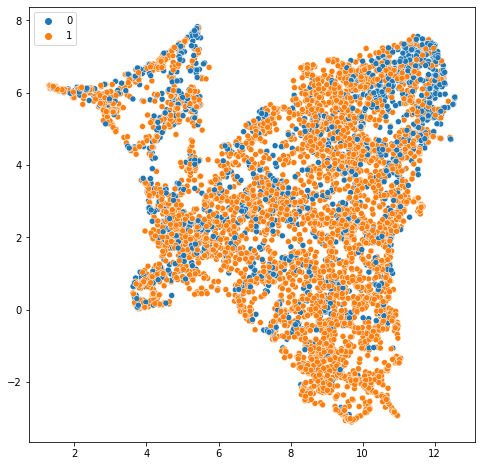

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.scatterplot(x=x_embs[:,0], y=x_embs[:,1], hue=dataset_y)

Text(0.5, 1.0, 'scatter plot of the bio embeddings of users who shared links in newsguard data')

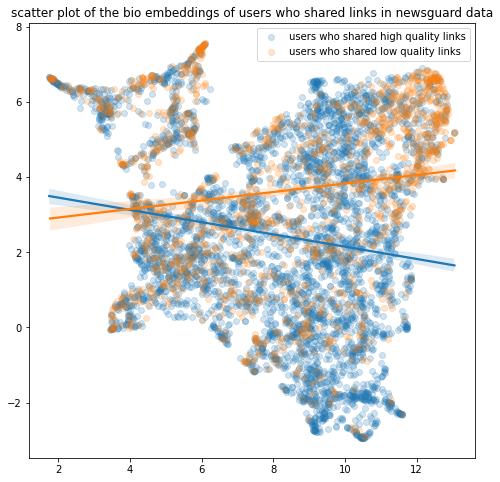

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8,8))

ds_emb = list(zip(x_embs, dataset_y))

ds_high = np.array([d[0] for d in ds_emb if d[1] == 1])
ds_low = np.array([d[0] for d in ds_emb if d[1] == 0])

sns.regplot(x=ds_high[:,0], y=ds_high[:,1], scatter_kws={'alpha':0.2}, label='users who shared high quality links')
sns.regplot(x=ds_low[:,0], y=ds_low[:,1], scatter_kws={'alpha':0.2}, label='users who shared low quality links')
plt.legend()
plt.title("scatter plot of the bio embeddings of users who shared links in newsguard data")

In [117]:
assert len(bios) == len(dataset_y)
anal = list(zip(x_embs, dataset_y, bios))

# region = [d for d in anal if d[0][0] > 8 and d[0][1] < -1 and d[1] == 1]
region = [d for d in anal if d[0][0] > 10 and d[0][1] > 4 and d[1] == 0]
# region = [d for d in anal if d[0][0] < 7 and d[0][1] > 4]

print("*"*100)
for i in range(100):
    print(region[i][2])
    print("-"*100)
    
print("*"*100)

****************************************************************************************************
mom, grandson, twins, boy, girl, two 2 amazing daughters, son, #resistence
----------------------------------------------------------------------------------------------------
attivista amministratore gruppo facebook donald trump italian fan club, socio ordinario associazione noicontrump
----------------------------------------------------------------------------------------------------
god, family, faith, live, let live, be good to the earth, thankful every day, draw your line in the sand
----------------------------------------------------------------------------------------------------
not politically correct, stop the corruption in government, stop voter fraud, no mandates, freedom of speech, gun rights, no crt in schools, jesus is lord
----------------------------------------------------------------------------------------------------
ca conservatives reclaiming us heritage by harv

Text(0.5, 1.0, 'scatter plot of the bio embeddings of users who shared links in newsguard data')

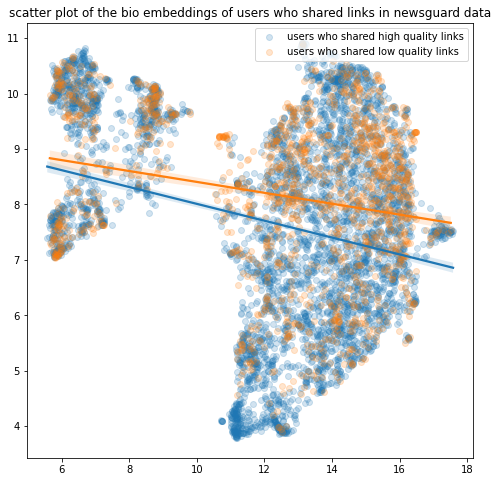

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8,8))

ds_emb = list(zip(x_embs, dataset_y))

ds_high = np.array([d[0] for d in ds_emb if d[1] == 1])
ds_low = np.array([d[0] for d in ds_emb if d[1] == 0])

sns.regplot(x=ds_high[:,0], y=ds_high[:,1], scatter_kws={'alpha':0.2}, label='users who shared high quality links')
sns.regplot(x=ds_low[:,0], y=ds_low[:,1], scatter_kws={'alpha':0.2}, label='users who shared low quality links')
plt.legend()
plt.title("scatter plot of the bio embeddings of users who shared links in newsguard data")

# Analyzing most recent tweets

## collected tweet data

In [121]:
!ls -hs /net/data/twitter/kenny-data/deca_coll/user_data/json/

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
total 207G
26G 9ScCu5qy3bAMa45FDUGsvi5PA_796529437332406272-9hPlM3DomkI9A3OgAN9C4r3kErK6xd8.json.bz2
26G bFLbP3Lx9k1hnJrZKXSCecSEv_1174057221363306497-8sqdthfwSPqIvlCS7iMQeNbAdoIsGn.json.bz2
26G fixudX0haOPZWb9HRyzVGdC6b_1170906622832627712-Uzdo2BPO3KbBb8fbp6sHXun8ZJrn6O.json.bz2
26G J0uCBvMrekOKSMTsWaAyrw_2520609314-EoPdnmcv7pFqZpcpxeixGnxu6zh2nSeSZcj3mYf.json.bz2
26G qs1Zr3JtxtVu32ySYa4bpsUXU_1171602259693703168-2kRPJA10fwBfmfFnay39JLobbDko9W.json.bz2
26G Qz26eZBrD06GHGOtkyntg_227062815-YC4j37Or2TmP1oYI2PxOksxoXHPjt0bgvvI5vGBz.json.bz2
26G r1GaQOYcmGK1NqP0vTkqKCDf9_1179594255016308736-qz0Mo1qqmgIqJJHDDpnOCSSwvii1TR.json.bz2
26G UnJyRItQbjKhWlEDSGlS3uL5l_117162004623

In [125]:
!bzcat "/net/data/twitter/kenny-data/deca_coll/user_data/json/9ScCu5qy3bAMa45FDUGsvi5PA_796529437332406272-9hPlM3DomkI9A3OgAN9C4r3kErK6xd8.json.bz2" | head

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
{"contributors":null,"truncated":false,"is_quote_status":false,"in_reply_to_status_id":1626281761649876992,"id":1626283214108073985,"favorite_count":0,"full_text":"@peterbakernyt He'll be telling us that his physical was like that of an Olympic athlete, his IQ is over 195...","source":"<a href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\">Twitter Web App<\/a>","retweeted":false,"coordinates":null,"entities":{"symbols":[],"user_mentions":[{"id":123327472,"indices":[0,14],"id_str":"123327472","screen_name":"peterbakernyt","name":"Peter Baker"}],"hashtags":[],"urls":[]},"in_reply_to_screen_name":"peterbakernyt","in_reply_to_user_id":123327472,"display_text_range":[15

In [3]:
!rm -rf '/net/data/twitter/kenny-data/navid/recent_tweets/'

In [10]:
recent_tweets_df = spark.read.json('/net/data/twitter/kenny-data/deca_coll/user_data/json/')
recent_tweets_df = recent_tweets_df.select(
    F.col('id'), F.col("user.id").alias("uid"), F.col("user.description").alias("description"),
    F.col('created_at'), F.col("entities.urls.expanded_url").alias("orig_urls"),
    F.col("retweeted_status.entities.urls.expanded_url").alias("ret_urls"))

# (recent_tweets_df
#  .select("uid", 'description')
#  .dropDuplicates(subset=['uid'])
#  .write.parquet('/net/data/twitter/kenny-data/navid/recent_tweets_users/', mode='overwrite'))

recent_tweets_df.write.parquet('/net/data/twitter/kenny-data/navid/recent_tweets_tweets/', mode='overwrite')

ERROR:root:KeyboardInterrupt while sending command.             (0 + 30) / 1650]
Traceback (most recent call last):
  File "/home/smadani/venvs/genv/lib/python3.10/site-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/home/smadani/venvs/genv/lib/python3.10/site-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt

KeyboardInterrupt



In [7]:
!ls /net/data/twitter/kenny-data/navid/recent_tweets_tweets/

_temporary


In [8]:
!du -hs /net/data/twitter/kenny-data/navid/recent_tweets_users/

20M	/net/data/twitter/kenny-data/navid/recent_tweets_users/


In [22]:
df = spark.read.parquet("/net/data/twitter/kenny-data/navid/recent_tweets/")

23/03/15 16:44:55 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [23]:
df = df.select(F.col("id"), F.col("uid"), F.col("user.description").alias("description"), F.col("created_at"),
          F.col("orig_urls.expanded_url").alias("orig_urls"), 
          F.col("ret_urls.entities.urls.expanded_url").alias("ret_urls"))


df.select("uid", 'description').distinct().write.parquet('/net/data/twitter/kenny-data/navid/recent_tweets2_users/', mode='overwrite')
df.drop("description").write.parquet('/net/data/twitter/kenny-data/navid/recent_tweets2_tweets/', mode='overwrite')

In [24]:
!du -hs /net/data/twitter/kenny-data/navid/recent_tweets2/

20G	/net/data/twitter/kenny-data/navid/recent_tweets2/


## recent tweets of users analyzed with links

In [93]:
%%time

tweet_df = spark.read.parquet('/net/data/twitter/kenny-data/navid/recent_tweets2/')
#TODO: consider twitter links or not (for replies)?
#TODO: consider retweets or not?

#orig:
# tweet_df = tweet_df.filter(F.col)
#all:
tweet_df = tweet_df.withColumn('urls', F.concat('orig_urls', 'ret_urls')).drop('orig_urls', 'ret_urls')

distinct_tweets = (
    tweet_df
    .dropDuplicates(subset=['id'])
)

user_total = (
    distinct_tweets
    .groupBy('uid')
    .agg(F.count('id').alias('num_total_tweets'))
)

#note that since a bunch of tweets don't have links (null) we're throwing them away
tweets_domain_df = (
    distinct_tweets
    .select("uid", "urls")
    .select("uid", F.explode("urls").alias("url"))
    .withColumn("domain", get_domain(F.col('url')))
    .filter(F.col('domain') != 'twitter.com')
)

sites_df = sites_df.filter(~F.col('site').contains('sports'))
print(sites_df.count())

tweets_domain_df = (
    tweets_domain_df
    .join(sites_df, how='left', on=(sites_df.site == tweets_domain_df.domain))
)


user_total_url = (
    tweets_domain_df
    .select('uid', 'domain', 'site', 'quality')
    .groupBy('uid')
    .agg(
        F.sum(F.col('domain').isNotNull().cast(T.IntegerType())).alias('num_tweets_with_a_link'),
        F.sum(F.col('site').isNotNull().cast(T.IntegerType())).alias('num_tweets_with_newsguard_link'),
        
        F.sum((F.col('quality') == 'High Quality').cast(T.IntegerType())).alias('num_tweets_high_quality'),
        F.sum((F.col('quality') == 'Quality').cast(T.IntegerType())).alias('num_tweets_quality'),
        F.sum((F.col('quality') == 'Low Quality').cast(T.IntegerType())).alias('num_tweets_low_quality'),
        F.sum((F.col('quality') == 'Very Low Quality').cast(T.IntegerType())).alias('num_tweets_very_low_quality'),
    )
)

result_df = (
    user_total
    .join(user_total_url, how='left', on='uid')
    .fillna(0, subset=[
        'num_tweets_high_quality', 'num_tweets_quality', 'num_tweets_low_quality',
        'num_tweets_very_low_quality', 'num_tweets_with_a_link', 'num_tweets_with_newsguard_link'])
    .orderBy(F.col('num_tweets_with_newsguard_link').desc())
)

# result_df.show(100)
result_df.write.parquet('/net/twitter/kenny-data/navid/recent_tweet_ds_all_sharing_stats2.parquet', mode='overwrite')

6765


CPU times: user 701 ms, sys: 262 ms, total: 963 ms
Wall time: 9min 35s


In [14]:
df = spark.read.parquet('/net/twitter/kenny-data/navid/recent_tweet_ds_all_sharing_stats2.parquet')
users_df = spark.read.parquet('/net/data/twitter/kenny-data/navid/recent_tweets_users/')
users_df = users_df.filter(F.length(F.col('description'))>0)

ERROR:root:KeyboardInterrupt while sending command.                 (0 + 0) / 1]
Traceback (most recent call last):
  File "/home/smadani/venvs/genv/lib/python3.10/site-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/home/smadani/venvs/genv/lib/python3.10/site-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt

KeyboardInterrupt



In [8]:
(
    df.count(),
    df.filter(F.col('num_tweets_with_a_link') > 0).count(),
    df.filter(F.col('num_tweets_with_newsguard_link') > 0).count()
)
    

(250826, 238044, 218990)

In [9]:
users_df.show(5)

+------+--------------------+
|   uid|         description|
+------+--------------------+
|  1325|Founder & CEO at ...|
| 13502|Old Hawaii geek; ...|
|354103|Hello! I'm Faris....|
|625653|Working @ UniTusc...|
|658923|Rational optimist...|
+------+--------------------+
only showing top 5 rows



### sample some langdetect bios for annotation

In [ ]:
import numpy as np
import pandas as pd

from langdetect import detect

sample_bios = users_df.dropDuplicates(['uid']).sample(0.1).select("description")
sample_bios.persist()

bios = [sample_bioscription for x in sample_bios.collect()]

en = []
nonen = []

for bio in tqdm(bios):
    try:
        if detect(bio) == 'en':
            en.append(bio)
        else:
            nonen.append(bio)
    except:
        nonen.append(bio)
        


np.random.shuffle(en)
np.random.shuffle(nonen)

sample = en[:500] + nonen[:500]
labels = [1]*500 + [0]*500

ds = list(zip(sample, labels))
np.random.shuffle(ds)

sample, labels = list(zip(*ds))

pd.DataFrame({'bio': sample, 'is_en': labels}).to_csv('langdetect_samples.csv', index=False, header=True)

### extract only english bios

In [13]:
from langdetect import detect

@F.udf(returnType=T.BooleanType())
def is_english(txt):
    try:
        return detect(txt) == 'en'
    except:
        return False

users_df = users_df.filter(is_english(F.col('description')))

In [ ]:
selected_users_df = (
    df
    .select("uid")
    .distinct()
    .join(users_df, how='left', on='uid')
)

selected_users_df.persist()
selected_users_df.count(), selected_users_df.show(5)

## extract pis

In [ ]:

bios_df = (
    selected_users_df
    .filter(F.col('description').isNotNull())
    .withColumn('pi', generate_personal_identifiers(F.col('description')))
    .drop('description')
    .filter(F.size(F.col('pi'))>0)
)

bios_df.persist()
bios_df.count(), bios_df.show(10)

## sampling pis for annotation based on frequency of terms

In [ ]:
bios = [x.pi for x in bios_df.collect()]
bios[:5]

In [ ]:
from collections import Counter

c = Counter()

for bio in bios:
    c.update(bio)

most_common_pis = [x[0] for x in c.most_common(200) if len(x[0])>2 and 'no dm' not in x[0]]
most_common_pis

In [ ]:
from langdetect import detect

selected_bios = []
for bio in tqdm(bios):
    for pi in most_common_pis:
        if pi in bio:
            try:
                if detect(','.join(bio)) == 'en':
                    selected_bios.append(bio)
            finally:
                break

In [ ]:
bios_str = [', '.join(bio) for bio in selected_bios]
len(bios_str)

In [ ]:
import pandas as pd
import numpy as np

np.random.shuffle(bios_str)
sampled_bios = bios_str[:10000]

pd.DataFrame({'bio': sampled_bios}).to_csv('sampled_bios.csv', header=True, index=False)

## extract labels

In [21]:
df.show(5)

+--------+----------------+----------------------+------------------------------+-----------------------+------------------+----------------------+---------------------------+
|     uid|num_total_tweets|num_tweets_with_a_link|num_tweets_with_newsguard_link|num_tweets_high_quality|num_tweets_quality|num_tweets_low_quality|num_tweets_very_low_quality|
+--------+----------------+----------------------+------------------------------+-----------------------+------------------+----------------------+---------------------------+
| 6667522|            3250|                    31|                             8|                      3|                 4|                     1|                          0|
|16100325|            3243|                    43|                             8|                      2|                 6|                     0|                          0|
|17792528|            2583|                   101|                             8|                      6|               

In [22]:
dataset_df = (
    bios_df
    .join(df, on='uid', how='left')
    .withColumn("low_quality_shares", F.col('num_tweets_low_quality')+F.col("num_tweets_very_low_quality"))
    .withColumnRenamed("num_tweets_with_newsguard_link", "total_newsguard")
    .withColumn("score", (F.col('num_tweets_low_quality')+F.col("num_tweets_very_low_quality"))/F.col("total_newsguard"))
    .select("uid", "pi", "low_quality_shares", "total_newsguard", "score")
)

dataset_df.persist()
print(dataset_df.count())
dataset_df.show(5)
dataset_df.write.parquet("/net/twitter/kenny-data/navid/share_quality_pi_dataset2.parquet")


143883
+--------+--------------------+------------------+---------------+--------------------+
|     uid|                  pi|low_quality_shares|total_newsguard|               score|
+--------+--------------------+------------------+---------------+--------------------+
|  794532|[executive direct...|                 0|             10|                 0.0|
| 1070071|[advocate for mat...|                 0|             37|                 0.0|
| 6531902|[correcting for t...|                 4|             69|0.057971014492753624|
|10666172|[german physicist...|                 0|             79|                 0.0|
|13290282|[award-winning wr...|                 2|             31| 0.06451612903225806|
+--------+--------------------+------------------+---------------+--------------------+
only showing top 5 rows



## loading extracted bios and embeddings

In [18]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split

import random

seed = 1234111
random.seed(seed)
np.random.seed(seed)


with open("/net/twitter/kenny-data/navid/pi_with_emb_and_score_both2.pkl", 'rb') as f:
    emb_labels = pickle.load(f)
    
# dataset = list(zip(emb_labels['embs'], emb_labels['shared_lowq']))

dataset_all = list(zip(emb_labels['sbertft_embs'], emb_labels['sbert_embs'], emb_labels['scores'], emb_labels['bios']))
dataset_all, test_ds_all = train_test_split(dataset_all, test_size=0.2, shuffle=True)

sample_1s = [d for d in dataset_all if d[2] > 0]
sample_0s = [d for d in dataset_all if d[2] == 0]
sample_1s = sorted(sample_1s, key=lambda x: -x[2])
sample_1s = sample_1s[:len(sample_0s)]

print(len(sample_1s), len(sample_0s))

dataset_all = sample_0s + sample_1s
np.random.shuffle(dataset_all)

print(len(dataset_all), len(test_ds_all))

34602 34602
69204 25211


In [24]:
bios = [d[3] for d in dataset_all]

/tmp/ipykernel_2760804/4290583925.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([s[2] for s in sample_1s])


0.11428571428571428


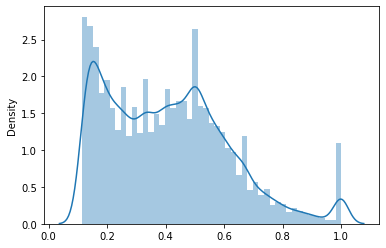

In [25]:
import seaborn as sns
sns.distplot([s[2] for s in sample_1s])
print(min([s[2] for s in sample_1s]))

In [26]:
from sklearn.model_selection import train_test_split

# 0 for sbertft, 1 for sbert
model_idx = 0

sbert_dataset = list(map(lambda x: (x[1], 1 if x[2] < 0.1 else 0), dataset_all))
sbertft_dataset = list(map(lambda x: (x[0], 1 if x[2] < 0.1 else 0), dataset_all))

sbert_test_ds = list(map(lambda x: (x[1], 1 if x[2] < 0.1 else 0), test_ds_all))
sbertft_test_ds = list(map(lambda x: (x[0], 1 if x[2] < 0.1 else 0), test_ds_all))

In [41]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, Ridge

train_x, train_y = list(zip(*sbert_dataset))
sbert_clf = LogisticRegressionCV(cv=5, random_state=0, n_jobs=10).fit(train_x, train_y)

train_x, train_y = list(zip(*sbertft_dataset))
sbertft_clf = LogisticRegressionCV(cv=5, random_state=0, n_jobs=10).fit(train_x, train_y)
# clf = Ridge().fit(train_x, train_y)

/home/smadani/venvs/genv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/smadani/venvs/genv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [36]:
from sklearn.metrics import precision_recall_fscore_support

train_x, train_y = list(zip(*dataset))

preds = sbert_clf.predict(train_x)
precision_recall_fscore_support(train_y, preds)



(array([0.74415549, 0.71900441]),
 array([0.70374545, 0.75804867]),
 array([0.72338656, 0.73801049]),
 array([34602, 34602]))

In [42]:
sbert_test_x, sbert_test_y = list(zip(*sbert_test_ds))
sbertft_test_x, sbertft_test_y = list(zip(*sbertft_test_ds))

sbert_preds = sbert_clf.predict(sbert_test_x)
sbertft_preds = sbertft_clf.predict(sbertft_test_x)

print(precision_recall_fscore_support(sbert_test_y, sbert_preds))
print(precision_recall_fscore_support(sbertft_test_y, sbertft_preds))

(array([0.53481039, 0.7837386 ]), array([0.69368206, 0.64786432]), array([0.60397339, 0.70935351]), array([ 9291, 15920]))
(array([0.55423451, 0.78991473]), array([0.69239049, 0.675     ]), array([0.615657  , 0.72795014]), array([ 9291, 15920]))


/tmp/ipykernel_2760804/2809285682.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sbertft_probs)
/tmp/ipykernel_2760804/2809285682.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sbert_probs)


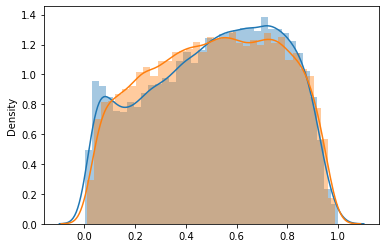

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns


sbertft_probs = sbertft_clf.predict_proba(sbertft_test_x)[:,1]
sbert_probs = sbert_clf.predict_proba(sbert_test_x)[:,1]

sns.distplot(sbertft_probs)
sns.distplot(sbert_probs)
plt.show()

## dim reduction and clustering

In [46]:
sbert_train_x, sbert_train_y = list(zip(*sbert_dataset))
sbertft_train_x, sbertft_train_y = list(zip(*sbertft_dataset))

In [47]:
import umap

def dimreduction(dataset_x):
    reducer = umap.UMAP()
    x_embs = reducer.fit_transform(dataset_x)
    return x_embs

sbert_x_embs = dimreduction(sbert_train_x)
sbertft_x_embs = dimreduction(sbertft_train_x)

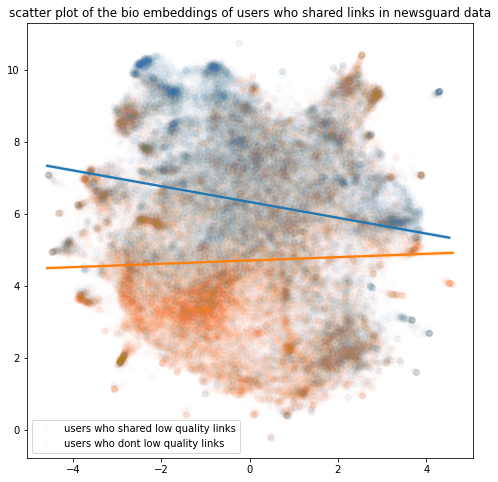

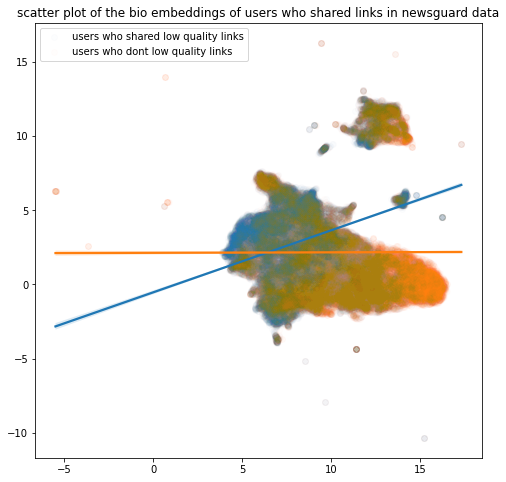

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def plot2d(x_embs, dataset_y):
    plt.figure(figsize=(8,8))

    ds_emb = list(zip(x_embs, dataset_y))

    ds_share_low = np.array([d[0] for d in ds_emb if d[1] == 1])
    ds_dont_share_low = np.array([d[0] for d in ds_emb if d[1] == 0])

    sns.regplot(x=ds_share_low[:,0], y=ds_share_low[:,1], scatter_kws={'alpha':0.01}, label='users who shared low quality links')
    sns.regplot(x=ds_dont_share_low[:,0], y=ds_dont_share_low[:,1], scatter_kws={'alpha':0.01}, label='users who dont low quality links')
    plt.legend()
    plt.title("scatter plot of the bio embeddings of users who shared links in newsguard data")
    plt.show()
    

plot2d(sbert_x_embs, sbert_train_y)
plot2d(sbertft_x_embs, sbertft_train_y)

In [52]:
# ranking pis

with open('/net/twitter/kenny-data/navid/pi_embs.pkl', 'rb') as f:
    pi_embs = pickle.load(f)
    
print(list(pi_embs.keys()))
pis = pi_embs['pis']
sbert_embs = pi_embs['sbert_pis']
sbertft_embs = pi_embs['sbertft_pis']



['pis', 'sbert_pis', 'sbertft_pis']


In [56]:
sbert_scores = list(sbert_clf.predict_proba(sbert_embs)[:,0])
pi_score_sbert = sorted(list(zip(pis, sbert_scores)), key=lambda x: x[1])


In [57]:
sbertft_scores = list(sbertft_clf.predict_proba(sbertft_embs)[:,0])
pi_score_sbertft = sorted(list(zip(pis, sbertft_scores)), key=lambda x: x[1])

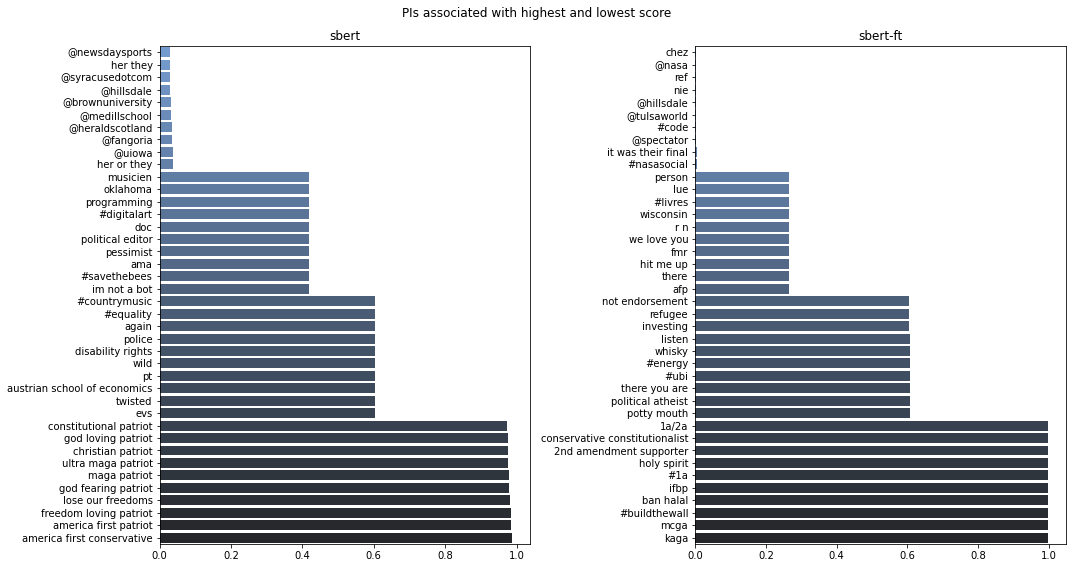

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

size = len(pi_score_sbert)
pi_score_sbert = pi_score_sbert[:10] + pi_score_sbert[size//3:size//3+10] + pi_score_sbert[2*size//3:2*size//3+10] + pi_score_sbert[-10:]
pi_score_sbertft = pi_score_sbertft[:10] + pi_score_sbertft[size//3:size//3+10] + pi_score_sbertft[2*size//3:2*size//3+10] + pi_score_sbertft[-10:]

fig, axes = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle(f'PIs associated with highest and lowest score')

cplt = sns.dark_palette("#69d", 40, reverse=True)

sns.barplot(
    ax=axes[0],
    x=[x[1] for x in pi_score_sbert],
    y=[x[0] for x in pi_score_sbert],
    palette=np.array(cplt)[[i for i in range(len(pi_score_sbert))]],
).set(title='sbert')


sns.barplot(
    ax=axes[1],
    x=[x[1] for x in pi_score_sbertft],
    y=[x[0] for x in pi_score_sbertft],
    palette=np.array(cplt)[[i for i in range(len(pi_score_sbertft))]],
).set(title='sbert-ft')


fig.tight_layout()
plt.show()



In [135]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, f1_score
from tqdm import tqdm


cls_train_y = [1 if s > 0 else 0 for s in train_y]
best_th = 0
best_f1 = 0
for th in tqdm(list(np.arange(0, 1.0, 0.01))):
    preds = clf.predict(train_x)
    preds = [1 if p > th else 0 for p in preds]

    f1 = f1_score(cls_train_y, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_th = th

print(f"best f1: {best_f1}\nbest threshold: {best_th}")

100%|███████████████████████████████████████████████████████████████| 100/100 [02:02<00:00,  1.23s/it]

best f1: 0.7926354867932572
best threshold: 0.02


/tmp/ipykernel_3063303/1757198831.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(preds)


<AxesSubplot:ylabel='Density'>

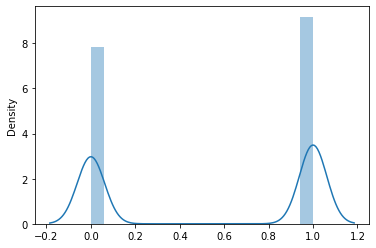

In [26]:
sns.distplot(preds)

## dim reduction and clustering

In [85]:
dataset_x, dataset_y = list(zip(*dataset))

In [86]:
import umap

reducer = umap.UMAP()

x_embs = reducer.fit_transform(dataset_x)

<AxesSubplot:>

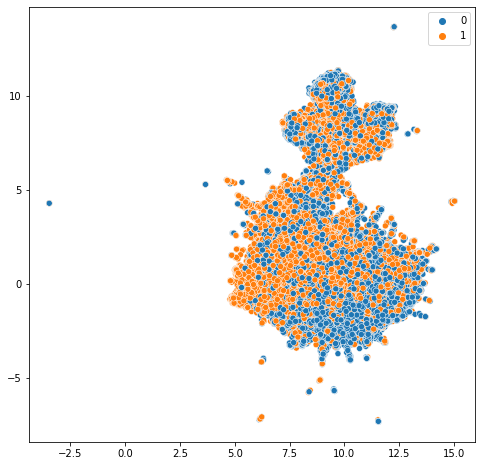

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.scatterplot(x=x_embs[:,0], y=x_embs[:,1], hue=dataset_y)

Text(0.5, 1.0, 'scatter plot of the bio embeddings of users who shared links in newsguard data')

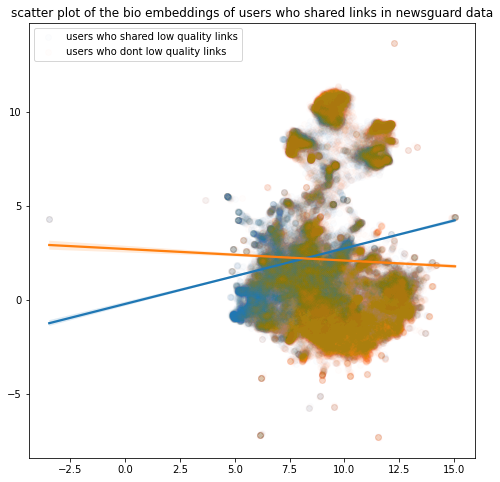

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8,8))

ds_emb = list(zip(x_embs, dataset_y))

ds_share_low = np.array([d[0] for d in ds_emb if d[1] == 1])
ds_dont_share_low = np.array([d[0] for d in ds_emb if d[1] == 0])

sns.regplot(x=ds_share_low[:,0], y=ds_share_low[:,1], scatter_kws={'alpha':0.01}, label='users who shared low quality links')
sns.regplot(x=ds_dont_share_low[:,0], y=ds_dont_share_low[:,1], scatter_kws={'alpha':0.01}, label='users who dont low quality links')
plt.legend()
plt.title("scatter plot of the bio embeddings of users who shared links in newsguard data")

In [91]:
assert len(bios) == len(dataset)
anal = list(zip(x_embs, dataset_y, bios))

region = [d for d in anal if d[0][1] > -5 and d[0][1] < -2 and d[0][0] > 8 and d[0][0] < 12]

np.random.shuffle(region)
print("*"*100)
print("average: ", np.mean([d[1] for d in region]))

for i in range(100):
    print(f"bio: {region[i][2]}, score: {region[i][1]}")
    print("-"*100)
    
print("*"*100)

****************************************************************************************************
average:  0.14462993056581475
bio: conservative christian, adore my grandson logan, trump 2024, rebuild the wall, ifbp, support israel, ga, blocked by steve schmidt+ prolife, score: 0
----------------------------------------------------------------------------------------------------
bio: conservative, patriot, warped sense of humor, constitutionalist, 2a defender, fiercely supporting, protecting the liberties granted to me by god, score: 0
----------------------------------------------------------------------------------------------------
bio: unapologetically pro-american, libertarian, small government, anti-hate, score: 0
----------------------------------------------------------------------------------------------------
bio: government is betraying the amercan people, legal but irrelevant citizen, baseball fan, ex-gop, pro law enforcement, anti-dc-swamp, vote, score: 0
-------------

## train a non-linear model on embeddings

In [343]:
from sklearn.model_selection import train_test_split
# class 0 is the probability of sharing fake news

data_x, labels = list(zip(*dataset))
labels = [1.0 if l > 0.1 else 0.0 for l in labels]
labels_2c = [[1-x, x] for x in labels]
dataset_processed = list(zip(data_x, labels_2c))

train, valid = train_test_split(dataset_processed, test_size=0.1, shuffle=True)

# Create PyTorch DataLoader objects for each dataset
def create_dataloader(split, shuffle=False, batch_size=256):
    data, labels = list(zip(*split))
    data_pt = torch.tensor(data)
    labels_pt = torch.tensor(labels)
    
    ds = torch.utils.data.TensorDataset(data_pt, labels_pt)
    dataloader = torch.utils.data.DataLoader(ds, batch_size=batch_size, shuffle=shuffle)
    
    return dataloader

# percentage of fake news sharing

sum(labels)/len(labels)

0.5

In [344]:
train_dataloader = create_dataloader(train, batch_size=128, shuffle=True)
valid_dataloader = create_dataloader(valid, batch_size=1000, shuffle=False)

test_x, test_labels = list(zip(*test_ds))
test_labels = [1.0 if l > 0.1 else 0.0 for l in test_labels]
labels_2c = [[1-x, x] for x in test_labels]
test_ds_processed = list(zip(test_x, labels_2c))
test_dataloader = create_dataloader(test_ds_processed, batch_size=1000, shuffle=False)

len(train_dataloader), next(iter(train_dataloader))

(665,
 [tensor([[-0.0142, -0.0212, -0.0219,  ...,  0.0302, -0.0343, -0.0530],
          [-0.0126,  0.0375, -0.0110,  ..., -0.0384, -0.0131,  0.0123],
          [-0.0240, -0.0054, -0.0142,  ...,  0.0102, -0.0168, -0.0329],
          ...,
          [-0.0013, -0.0299, -0.0156,  ...,  0.0277,  0.0121, -0.0558],
          [-0.0052, -0.0197, -0.0202,  ..., -0.0021, -0.0109, -0.0460],
          [ 0.0189, -0.0140, -0.0204,  ...,  0.0251, -0.0422, -0.0456]]),
  tensor([[1., 0.],
          [0., 1.],
          [1., 0.],
          [1., 0.],
          [0., 1.],
          [1., 0.],
          [1., 0.],
          [0., 1.],
          [0., 1.],
          [0., 1.],
          [1., 0.],
          [1., 0.],
          [0., 1.],
          [0., 1.],
          [1., 0.],
          [0., 1.],
          [0., 1.],
          [0., 1.],
          [1., 0.],
          [0., 1.],
          [1., 0.],
          [0., 1.],
          [1., 0.],
          [1., 0.],
          [1., 0.],
          [1., 0.],
          [1., 0.],
     

In [357]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

# Define the model architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(768, 128)
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.zeros_(self.fc1.bias)
        self.fc2 = nn.Linear(128, 128)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.zeros_(self.fc2.bias)
        self.fc3 = nn.Linear(128, 2)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.zeros_(self.fc2.bias)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.softmax(self.fc3(x), dim=1)
        return x

# Create an instance of the model
model = Net()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005, weight_decay=0.01)
scheduler = StepLR(optimizer, step_size=1, gamma=0.9)

In [358]:
from torchmetrics.classification import BinaryF1Score


# Define the training, validation, and test functions

from tqdm import tqdm

def train(model, optimizer, criterion, train_loader):
    model.train()
    train_loss = 0.0
    metric = BinaryF1Score()

    for data, target in tqdm(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        metric.update(output, target)

        train_loss += loss.item() * data.size(0)

    train_loss /= len(train_loader.dataset)
    return train_loss, metric.compute()

def validate(model, criterion, val_loader):
    model.eval()
    val_loss = 0.0
    metric = BinaryF1Score()

    with torch.no_grad():
        for data, target in tqdm(val_loader):
            output = model(data)
            loss = criterion(output, target)
            
            metric.update(output, target)
            
            val_loss += loss.item() * data.size(0)

    val_loss /= len(val_loader.dataset)
    return val_loss, metric.compute()



In [359]:
train_losses = []
train_f1s = []
val_losses = []
val_f1s = []
for ep in range(10):
    print("epoch:", ep, "Learning Rate:", optimizer.param_groups[0]['lr'], scheduler.get_last_lr())
    train_loss, train_f1 = train(model, optimizer, criterion, train_dataloader)
    val_loss, val_f1 = validate(model, criterion, valid_dataloader)
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    train_f1s.append(train_f1)
    val_f1s.append(val_f1)
    
    scheduler.step()
    
    print(f"epoch {ep}: train loss: {train_loss} valid loss: {val_loss}")
    print(f"train_f1: {train_f1}, val_f1:{val_f1}")
    

epoch: 0 Learning Rate: 0.005 [0.005]


100%|█████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.76it/s]


epoch 0: train loss: 0.6928834626549168 valid loss: 0.6926557469579729
train_f1: 0.5010573267936707, val_f1:0.49048423767089844
epoch: 1 Learning Rate: 0.0045000000000000005 [0.0045000000000000005]


100%|█████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 18.90it/s]


epoch 1: train loss: 0.6920779275714903 valid loss: 0.691899983631831
train_f1: 0.5054863691329956, val_f1:0.5128991603851318
epoch: 2 Learning Rate: 0.004050000000000001 [0.004050000000000001]


100%|█████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.64it/s]


epoch 2: train loss: 0.6914908230752873 valid loss: 0.6913697636387116
train_f1: 0.5790765881538391, val_f1:0.5979065299034119
epoch: 3 Learning Rate: 0.0036450000000000007 [0.0036450000000000007]


100%|█████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.94it/s]


epoch 3: train loss: 0.6910708154950823 valid loss: 0.6909791787246943
train_f1: 0.6277608275413513, val_f1:0.6511947512626648
epoch: 4 Learning Rate: 0.003280500000000001 [0.003280500000000001]


100%|█████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.50it/s]


epoch 4: train loss: 0.6907486855535578 valid loss: 0.6906719163271307
train_f1: 0.6617363691329956, val_f1:0.6634945869445801
epoch: 5 Learning Rate: 0.002952450000000001 [0.002952450000000001]


100%|█████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 23.51it/s]


epoch 5: train loss: 0.69047819734516 valid loss: 0.6904162138379082
train_f1: 0.6667645573616028, val_f1:0.6634594798088074
epoch: 6 Learning Rate: 0.002657205000000001 [0.002657205000000001]


100%|█████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.71it/s]


epoch 6: train loss: 0.6902445387123223 valid loss: 0.6901871869165264
train_f1: 0.6680921316146851, val_f1:0.6636709570884705
epoch: 7 Learning Rate: 0.002391484500000001 [0.002391484500000001]


100%|█████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 18.96it/s]


epoch 7: train loss: 0.6900348888304001 valid loss: 0.6899824299502761
train_f1: 0.6681978106498718, val_f1:0.6677944660186768
epoch: 8 Learning Rate: 0.002152336050000001 [0.002152336050000001]


100%|█████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.09it/s]


epoch 8: train loss: 0.6898434908766495 valid loss: 0.6897979317192398
train_f1: 0.6666353344917297, val_f1:0.6688517928123474
epoch: 9 Learning Rate: 0.001937102445000001 [0.001937102445000001]


100%|█████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.19it/s]

epoch 9: train loss: 0.6896678778461944 valid loss: 0.6896299271735814
train_f1: 0.6657424569129944, val_f1:0.6692746877670288


<AxesSubplot:>

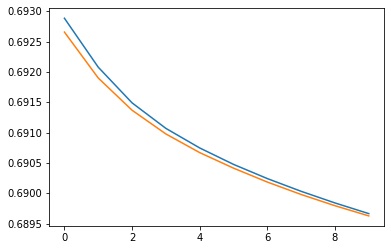

In [362]:
sns.lineplot(train_losses)
sns.lineplot(val_losses)

## test model's performance

In [353]:
from torchmetrics.classification import BinaryF1Score
from torchmetrics.classification import BinaryRecall, BinaryPrecision

f1 = BinaryF1Score()
recall = BinaryRecall()
precision = BinaryPrecision()


def test(model, test_loader):
    model.eval()
    test_loss = 0.0
    correct = 0
    outputs = []
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            loss = criterion(output, target)
            
            test_loss += loss.item() * data.size(0)
            
            #just to make it work
            target = torch.argmax(target, dim=1)
            target = torch.nn.functional.one_hot(target)
            
            f1.update(output, target)
            recall.update(output, target)
            precision.update(output, target)
            
            pred = output.cpu().numpy()
            outputs.append(pred)
    
    print(f"f1:{f1.compute()} recall:{recall.compute()} precision:{precision.compute()}")
    return np.concatenate(outputs)


preds = test(model, test_dataloader)



f1:0.6525964736938477 recall:0.6525964736938477 precision:0.6525964736938477


/tmp/ipykernel_122077/3504559834.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(preds[:,1])


array([0.6106722 , 0.43394125, 0.5713494 , ..., 0.58854175, 0.49575612,
       0.4750567 ], dtype=float32)

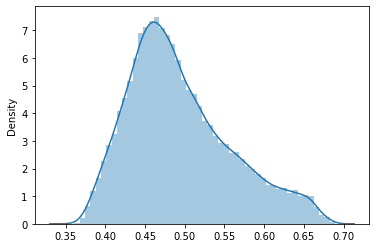

In [354]:
import seaborn as sns

sns.distplot(preds[:,1])
preds[:,1]

In [355]:
precision_recall_fscore_support(test_y, np.argmax(preds, axis=1))

(array([0.72157684, 0.54500223]),
 array([0.71211765, 0.55653295]),
 array([0.71681604, 0.55070724]),
 array([21283, 13187]))

# projection model

## load embeddings

In [63]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split

import random

seed = 1234111
random.seed(seed)
np.random.seed(seed)


with open("/net/twitter/kenny-data/navid/pi_with_emb_and_score_both2.pkl", 'rb') as f:
    emb_labels = pickle.load(f)
    
# dataset = list(zip(emb_labels['embs'], emb_labels['shared_lowq']))

dataset_all = list(zip(emb_labels['sbertft_embs'], emb_labels['sbert_embs'], emb_labels['scores'], emb_labels['bios'],
                      emb_labels['shared_lowq'], emb_labels['uids'], emb_labels['total_share']))
dataset_all, test_ds_all = train_test_split(dataset_all, test_size=0.2, shuffle=True)

sample_1s = [d for d in dataset_all if d[2] > 0]
sample_0s = [d for d in dataset_all if d[2] == 0]
sample_1s = sorted(sample_1s, key=lambda x: -x[2])
sample_1s = sample_1s[:len(sample_0s)]


print(len(sample_1s), len(sample_0s))

dataset_all = sample_0s + sample_1s
np.random.shuffle(dataset_all)

print(len(dataset_all), len(test_ds_all))

34602 34602
69204 25211


In [64]:
emb_labels.keys()


dict_keys(['uids', 'bios', 'scores', 'shared_lowq', 'total_share', 'sbertft_embs', 'sbert_embs'])

In [65]:
# 0 for sbertft, 1 for sbert

sbert_ds = list(map(lambda x: (x[1], 1 if x[2] > 0 else 0), dataset_all))
sbertft_ds = list(map(lambda x: (x[0], 1 if x[2] > 0 else 0), dataset_all))

sbert_test_ds = list(map(lambda x: (x[1], 1 if x[2] > 0 else 0), test_ds_all))
sbertft_test_ds = list(map(lambda x: (x[0], 1 if x[2] > 0 else 0), test_ds_all))

sum([x[1] for x in sbert_ds])

34602

## load poles

In [66]:
measures = []

measures = [{
    "group": "age",
    "names": ['young', 'old'],
    "sets": [['young'], ['old']],
    "paper": "this_short",
    "is_paired": True
}, {
    "group":
    "age",
    "names": ['young', 'old'],
    "sets": [['young', 'new', 'youthful', 'young'],
             ['old', 'old', 'elderly', 'aged']],
    "paper":
    "this_long",
    "is_paired":
    True
}]

measures.append({
    "group":
    "politics",
    "names": ['democrat', 'republican'],
    "sets": [['democratic party supporter', 'left-leaning', 'democrat'], ['republican party supporter', 'right-leaning', 'republican']],
    "paper":
    "unk",
    "is_paired":
    True
})

measures.append({
    "group":
    "religion",
    "names": ['atheist', 'religious'],
    "sets": [['atheistic', 'agnostic', 'non-believing', 'skeptical'], ['religious', 'faithful', 'christian', 'believe in lord']],
    "paper":
    "unk",
    "is_paired":
    True
})

measures.append({
    "group":
    "education",
    "names": ['educated', 'uneducated'],
    "sets": [['educated', 'higher education'], ['uneducated', 'unschooled']],
    "paper":
    "unk",
    "is_paired":
    True
})

measures.append({
    "group":
    "employment status",
    "names": ['employed', 'unemployed'],
    "sets": [['employed', 'hired', 'working', 'on the job'], ['unemployed', 'jobless', 'out of work', 'retired']],
    "paper":
    "unk",
    "is_paired":
    True
})

In [67]:
dims = {}
for m in measures:
    if m['group'] in dims:
        dims[m['group']][0].extend(m['sets'][0])
        dims[m['group']][1].extend(m['sets'][1])
    else:
        dims[m['group']] = [m['sets'][0], m['sets'][1]]
        
for g, p in dims.items():
    p[0] = list(set(p[0]))
    p[1] = list(set(p[1]))
    
len(dims), dims

(5,
 {'age': [['new', 'youthful', 'young'], ['old', 'aged', 'elderly']],
  'politics': [['democrat', 'left-leaning', 'democratic party supporter'],
   ['republican party supporter', 'republican', 'right-leaning']],
  'religion': [['agnostic', 'non-believing', 'skeptical', 'atheistic'],
   ['believe in lord', 'faithful', 'christian', 'religious']],
  'education': [['educated', 'higher education'],
   ['uneducated', 'unschooled']],
  'employment status': [['on the job', 'hired', 'employed', 'working'],
   ['out of work', 'unemployed', 'jobless', 'retired']]})

In [68]:
from sentence_transformers import SentenceTransformer

sbertft_emb_model = SentenceTransformer('/net/twitter/kenny-data/navid/mpnet')
sbert_emb_model = SentenceTransformer('all-mpnet-base-v2')

In [69]:

sbert_pole_diffs = []
sbertft_pole_diffs = []


for pol_name, poles in dims.items():
    print(pol_name)
    vs = sbertft_emb_model.encode([', '.join(poles[0]), ', '.join(poles[1])])
    sbertft_pole_diffs.append(vs[1]-vs[0])
    
for pol_name, poles in dims.items():
    print(pol_name)
    vs = sbert_emb_model.encode([', '.join(poles[0]), ', '.join(poles[1])])
    sbert_pole_diffs.append(vs[1]-vs[0])

age
politics
religion
education
employment status
age
politics
religion
education
employment status


In [70]:
from numpy import linalg as LA
import numpy as np


def normalize(wv):
    # normalize vectors
    norms = np.apply_along_axis(LA.norm, 1, wv)
    wv = wv / (norms[:, np.newaxis]+1e-6)
    return wv


def ripa(w, b):
    return w.dot(b)/LA.norm(b)


def get_proj_embeddings(init_embs, pole_diffs):
       
    pi_prj_embs = []
    print("calculating projections")
    for init_emb in init_embs:
        prj = []
        for diff in pole_diffs:
            prj.append(ripa(init_emb, diff))
        pi_prj_embs.append(np.array(prj))
        
    return pi_prj_embs



In [71]:
def generate_prj_ds(dataset, pole_diffs):
    prj_embs = get_proj_embeddings([d[0] for d in dataset], pole_diffs)
    prj_ds = [(projected_emb, label) for projected_emb, (e, label) in zip(prj_embs, dataset)]
    return prj_ds

sbertft_prj_ds = generate_prj_ds(sbertft_ds, sbertft_pole_diffs)
sbert_prj_ds = generate_prj_ds(sbert_ds, sbert_pole_diffs)

sbertft_prj_test_ds = generate_prj_ds(sbertft_test_ds, sbertft_pole_diffs)
sbert_prj_test_ds = generate_prj_ds(sbert_test_ds, sbert_pole_diffs)

calculating projections
calculating projections
calculating projections
calculating projections


In [72]:
sbertft_prj_ds[:3]

[(array([-0.01263609, -0.107866  ,  0.01560153,  0.05553226, -0.19348827],
        dtype=float32),
  1),
 (array([ 0.10100684,  0.01068396,  0.10628872, -0.24947995, -0.13306533],
        dtype=float32),
  0),
 (array([ 0.01702389, -0.08114367, -0.04132462, -0.13432333, -0.1617161 ],
        dtype=float32),
  0)]

## save full projected dataset

In [91]:
import pandas as pd


assert len(test_ds_all) == len(sbert_prj_test_ds) == len(sbertft_prj_test_ds)
assert len(dataset_all) == len(sbertft_prj_ds) == len(sbert_prj_ds)

# emb_labels['sbertft_embs'], emb_labels['sbert_embs'], emb_labels['scores'], emb_labels['bios'],
#                       emb_labels['shared_lowq'], emb_labels['uids']))
train_data = []

for sbert_prj_ex, sbertft_prj_ex, data in zip(sbert_prj_test_ds, sbertft_prj_test_ds, test_ds_all):
    train_data.append({
        'uid': data[5],
        'bio': data[3],
        'sbert_prj': sbert_prj_ex[0],
        'sbertft_prj': sbertft_prj_ex[0],
        'n_low_quality': data[6]*data[2],
        'n_total': data[6],
        'label': sbert_prj_ex[1],
    })

# pd.DataFrame(train_data).to_csv('test_reg.csv', header=True, index=False)

test_data = []

for sbert_prj_ex, sbertft_prj_ex, data in zip(sbert_prj_ds, sbertft_prj_ds, dataset_all):
    test_data.append({
        'uid': data[5],
        'bio': data[3],
        'sbert_prj': sbert_prj_ex[0],
        'sbertft_prj': sbertft_prj_ex[0],
        'n_low_quality': data[6]*data[2],
        'n_total': data[6],
        'label': sbert_prj_ex[1],
    })
    
# pd.DataFrame(test_data).to_csv('train_reg.csv', header=True, index=False)

In [89]:
!wc -l train_reg.csv

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
70069 train_reg.csv


In [90]:
!wc -l test_reg.csv

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
25478 test_reg.csv


## analyzing each dimension individually

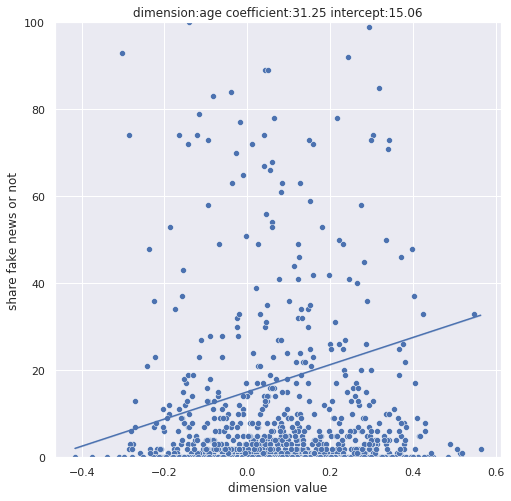

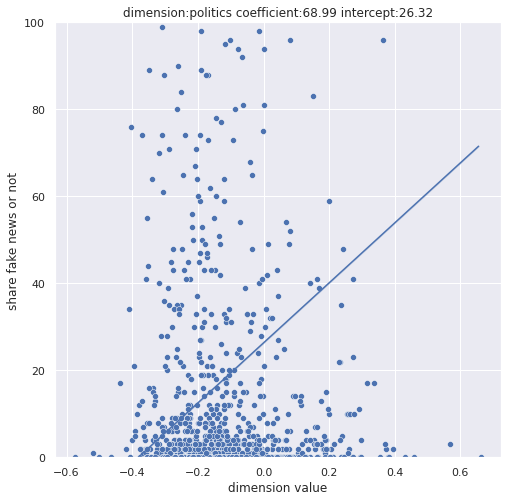

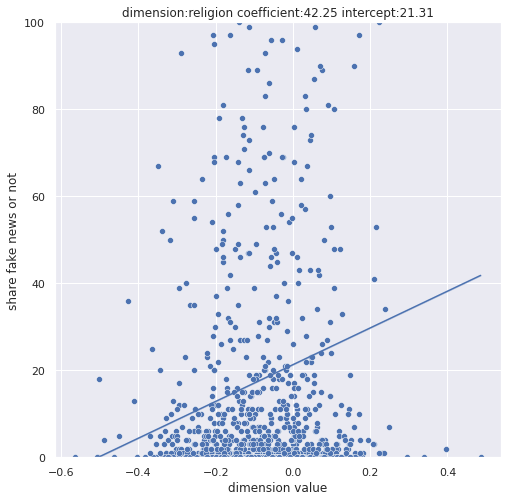

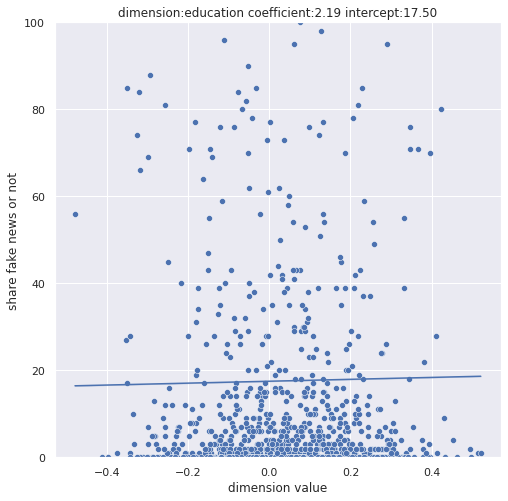

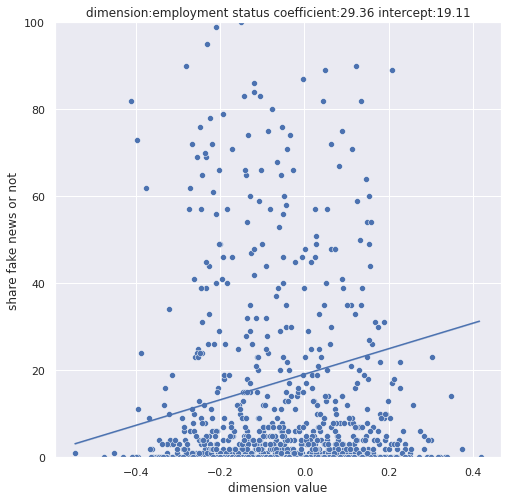

In [100]:
from sklearn.linear_model import LinearRegression 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

for idx, dim in enumerate(dims.keys()):
    plt.figure(figsize=(8,8))

    Xs = np.array([x['sbertft_prj'] for x in train_data])[:,idx].reshape(-1,1)
    ys = np.array([x['n_low_quality'] for x in train_data])

    clf = LinearRegression()

    clf.fit(Xs, ys)
    a, b = clf.coef_[0], clf.intercept_
    
    Xs = Xs.squeeze()
    
    Xs = np.random.choice(Xs, 1000)
    ys = np.random.choice(ys, 1000)

    sns.scatterplot(x=Xs, y=ys)
    
    x = np.array(list(sorted(np.random.choice(np.arange(min(Xs), max(Xs), 0.01), 1000))))
    reg = a*x+b
    sns.lineplot(x=x, y=reg)
    
    plt.ylim(0,100)
    plt.title(f"dimension:{dim} coefficient:{a:.2f} intercept:{b:.2f}")
    plt.xlabel('dimension value')
    plt.ylabel('share fake news or not')
    plt.show()

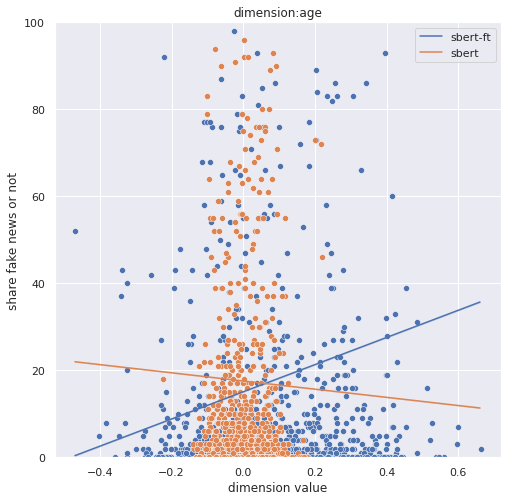

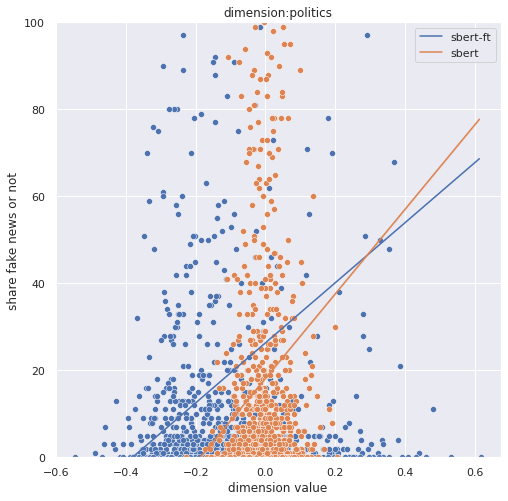

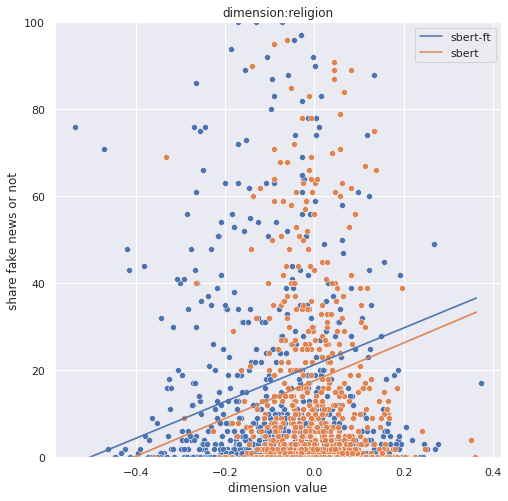

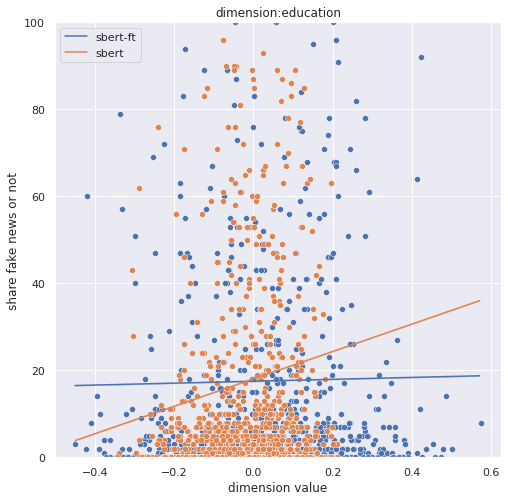

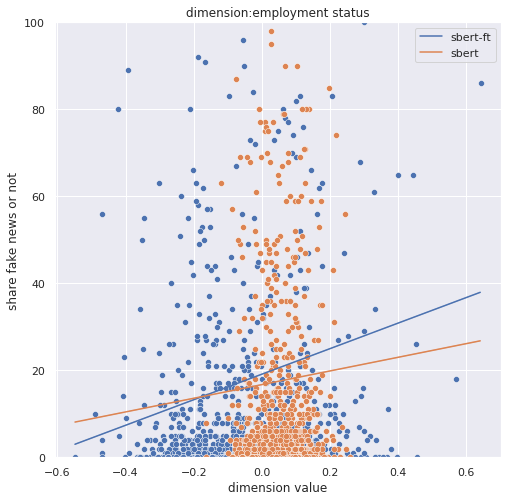

In [103]:
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

for idx, dim in enumerate(dims.keys()):
    plt.figure(figsize=(8,8))

    Xs = np.array([x['sbertft_prj'] for x in train_data])[:,idx].reshape(-1,1)
    ys = np.array([x['n_low_quality'] for x in train_data])

    clf = LinearRegression()

    clf.fit(Xs, ys)
    a, b = clf.coef_[0], clf.intercept_
    
    Xs = Xs.squeeze()
    
    Xs = np.random.choice(Xs, 1000)
    ys = np.random.choice(ys, 1000)

    sns.scatterplot(x=Xs, y=ys)
    _min, _max = min(Xs), max(Xs)
    x = np.array(list(sorted(np.random.choice(np.arange(_min, _max, 0.01), 1000))))
    reg = a*x+b
    sns.lineplot(x=x, y=reg, label='sbert-ft')
    
    Xs = np.array([x['sbert_prj'] for x in train_data])[:,idx].reshape(-1,1)
    ys = np.array([x['n_low_quality'] for x in train_data])

    clf = LinearRegression()

    clf.fit(Xs, ys)
    a, b = clf.coef_[0], clf.intercept_
    
    Xs = Xs.squeeze()
    
    Xs = np.random.choice(Xs, 1000)
    ys = np.random.choice(ys, 1000)

    sns.scatterplot(x=Xs, y=ys)
    
    x = np.array(list(sorted(np.random.choice(np.arange(_min, _max, 0.01), 1000))))
    reg = a*x+b
    sns.lineplot(x=x, y=reg, label='sbert')
    
    plt.ylim(0, 100)
    
    plt.title(f"dimension:{dim}")
    plt.xlabel('dimension value')
    plt.ylabel('share fake news or not')
    plt.show()

## pairplot of each projected dim vs label

<Figure size 720x720 with 0 Axes>

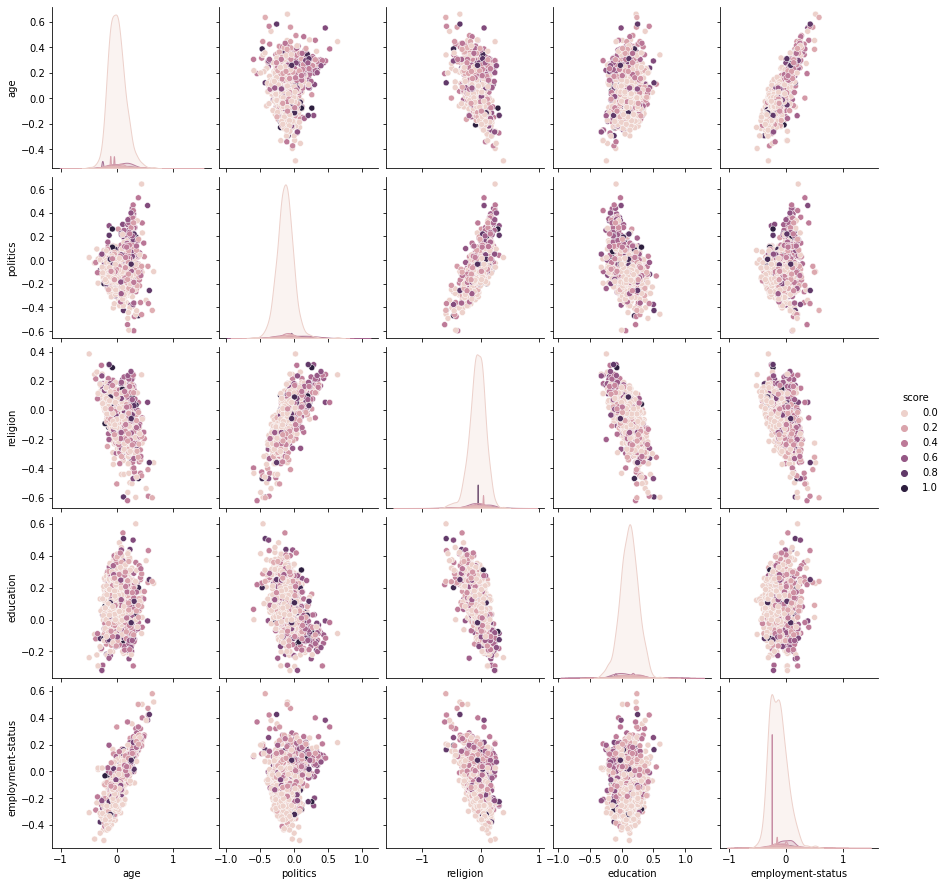

In [36]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def pairplot(ds):
    plt.figure(figsize=(10,10))
    features, label = zip(*ds)

    # Convert the features and label to numpy arrays
    features = np.array(features)
    label = np.array(label)

    # Combine the features and label into a single numpy array
    data = np.column_stack((features, label))
    
    row_indices = np.random.choice(data.shape[0], size=1000, replace=False)
    sampled_rows = data[row_indices, :]
    df = pd.DataFrame(sampled_rows, 
                      columns=['age', 'politics', 'religion', 'education', 'employment-status', 'score'])

    sns.pairplot(df, hue='score')
    plt.show()
    
pairplot(sbertft_prj_ds)

<Figure size 720x720 with 0 Axes>

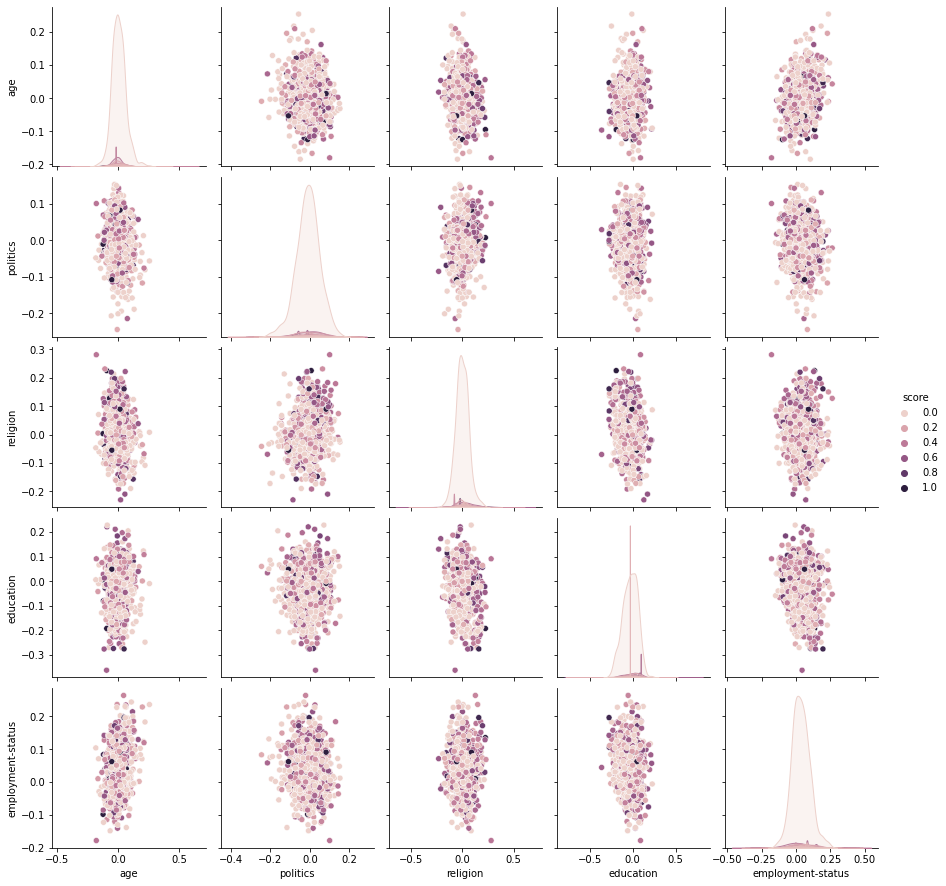

In [37]:
pairplot(sbert_prj_ds)

## emb vs label

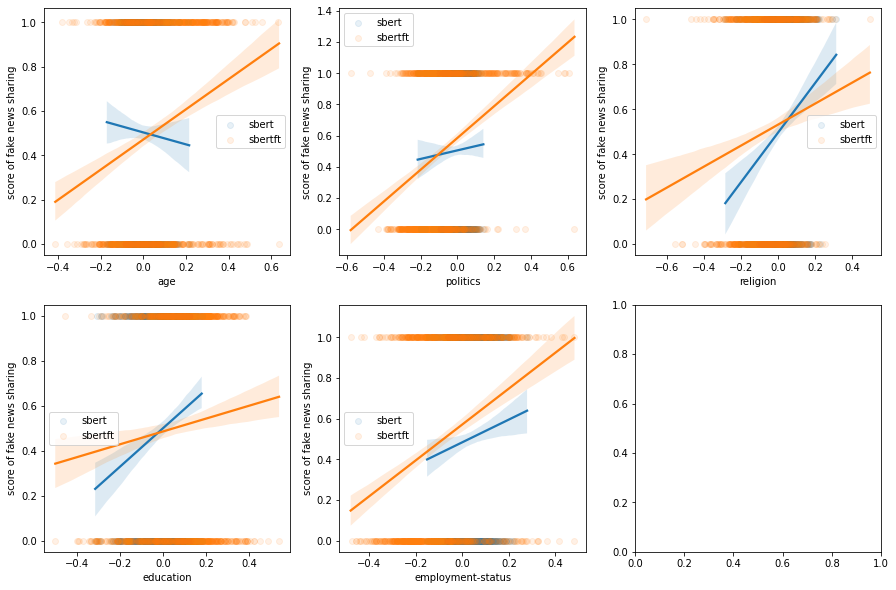

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

row_indices = np.random.choice(len(sbert_ds), size=1000, replace=False)
sampled_sbert = [sbert_prj_ds[i] for i in row_indices]
sampled_sbertft = [sbertft_prj_ds[i] for i in row_indices]

for i, name in enumerate(['age', 'politics', 'religion', 'education', 'employment-status']):
    
    
    sns.regplot(
        x=np.array([x[0][i] for x in sampled_sbert]),
        y=np.array([x[1] for x in sampled_sbert]),
        scatter_kws={'alpha':0.1},
        label='sbert',
        ax=axs[i]
    )
    
    sns.regplot(
        x=np.array([x[0][i] for x in sampled_sbertft]),
        y=np.array([x[1] for x in sampled_sbertft]),
        scatter_kws={'alpha':0.1},
        ax=axs[i],
        label='sbertft'
    )

    axs[i].set_xlabel(name)
    axs[i].set_ylabel('score of fake news sharing')
    axs[i].legend()

plt.show()
    


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8,8))


ds_share_low = np.array([d[0] for d in prj_ds if d[1] > 0])
ds_dont_share_low = np.array([d[0] for d in prj_ds if d[1] == 0])

sns.regplot(x=ds_share_low[:,0], y=ds_share_low[:,1], scatter_kws={'alpha':0.01}, label='users who shared low quality links')
sns.regplot(x=ds_dont_share_low[:,0], y=ds_dont_share_low[:,1], scatter_kws={'alpha':0.01}, label='users who dont low quality links')
plt.legend()
plt.xlabel('age')
plt.ylabel('political party')
plt.title("scatter plot of the bio embeddings of users who shared links in newsguard data")

IndexError: index 5 is out of bounds for axis 1 with size 5

<Figure size 576x576 with 0 Axes>

Text(0.5, 1.0, 'scatter plot of the bio embeddings of users who shared links in newsguard data')

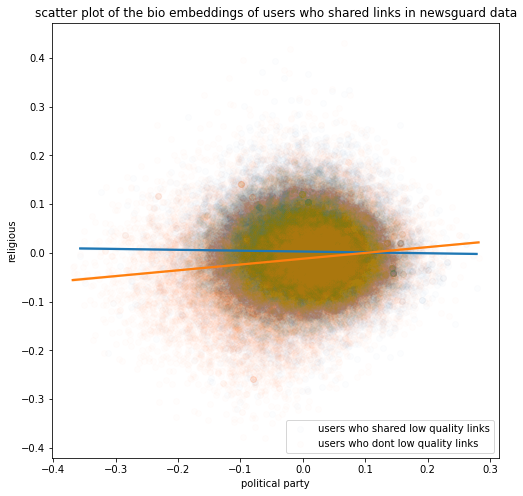

In [49]:
plt.figure(figsize=(8,8))

sns.regplot(x=ds_share_low[:,1], y=ds_share_low[:,2], scatter_kws={'alpha':0.01}, label='users who shared low quality links')
sns.regplot(x=ds_dont_share_low[:,1], y=ds_dont_share_low[:,2], scatter_kws={'alpha':0.01}, label='users who dont low quality links')
plt.legend()
plt.xlabel('political party')
plt.ylabel('religious')
plt.title("scatter plot of the bio embeddings of users who shared links in newsguard data")

## train a model with projected emebeddings

In [107]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, Ridge


sbert_train_x, sbert_train_y = list(zip(*sbert_prj_ds))
sbertft_train_x, sbertft_train_y = list(zip(*sbertft_prj_ds))

sbert_clf = LogisticRegressionCV(cv=5, random_state=0).fit(sbert_train_x, sbert_train_y)
sbertft_clf = LogisticRegressionCV(cv=5, random_state=0).fit(sbertft_train_x, sbertft_train_y)
# clf = Ridge().fit(train_x, train_y)

In [139]:
np.array(sbert_train_y)

array([1, 0, 0, ..., 0, 1, 1])

In [149]:
import numpy as np
from catboost import CatBoostClassifier, Pool

sbert_test_x, sbert_test_y = list(zip(*sbert_prj_test_ds))

model = CatBoostClassifier(
    iterations=100,
    depth=4,
    learning_rate=0.01,
    loss_function='Logloss',
    verbose=True,
    eval_metric='F1'
    
)

# train the model
model.fit(
    np.array(sbert_train_x), np.array(sbert_train_y),
    eval_set=(np.array(sbert_test_x), np.array(sbert_test_y)),
)


0:	learn: 0.6240348	test: 0.6619051	best: 0.6619051 (0)	total: 6.73ms	remaining: 666ms
1:	learn: 0.5981467	test: 0.6099087	best: 0.6619051 (0)	total: 11.8ms	remaining: 576ms
2:	learn: 0.5991734	test: 0.6144238	best: 0.6619051 (0)	total: 16.7ms	remaining: 539ms
3:	learn: 0.6029540	test: 0.6180962	best: 0.6619051 (0)	total: 20.8ms	remaining: 500ms
4:	learn: 0.6097697	test: 0.6263672	best: 0.6619051 (0)	total: 25.1ms	remaining: 478ms
5:	learn: 0.6067823	test: 0.6234759	best: 0.6619051 (0)	total: 29.2ms	remaining: 457ms
6:	learn: 0.6052848	test: 0.6212640	best: 0.6619051 (0)	total: 34.9ms	remaining: 463ms
7:	learn: 0.6094272	test: 0.6264027	best: 0.6619051 (0)	total: 39.2ms	remaining: 451ms
8:	learn: 0.6058904	test: 0.6220208	best: 0.6619051 (0)	total: 43.5ms	remaining: 439ms
9:	learn: 0.6067400	test: 0.6227470	best: 0.6619051 (0)	total: 47.6ms	remaining: 429ms
10:	learn: 0.6074658	test: 0.6224772	best: 0.6619051 (0)	total: 52.2ms	remaining: 422ms
11:	learn: 0.6079788	test: 0.6247976	best:

In [150]:
import numpy as np
from catboost import CatBoostClassifier, Pool

sbertft_test_x, sbertft_test_y = list(zip(*sbertft_prj_test_ds))

model = CatBoostClassifier(
    iterations=100,
    depth=4,
    learning_rate=0.01,
    loss_function='Logloss',
    verbose=True,
    eval_metric='F1'
    
)

# train the model
model.fit(
    np.array(sbertft_train_x), np.array(sbertft_train_y),
    eval_set=(np.array(sbertft_train_x), np.array(sbertft_train_y)),
)


0:	learn: 0.6338975	test: 0.6338975	best: 0.6338975 (0)	total: 7.39ms	remaining: 732ms
1:	learn: 0.6715423	test: 0.6715423	best: 0.6715423 (1)	total: 12.5ms	remaining: 615ms
2:	learn: 0.6751614	test: 0.6751614	best: 0.6751614 (2)	total: 17.4ms	remaining: 563ms
3:	learn: 0.6712200	test: 0.6712200	best: 0.6751614 (2)	total: 22.1ms	remaining: 530ms
4:	learn: 0.6734366	test: 0.6734366	best: 0.6751614 (2)	total: 26.6ms	remaining: 505ms
5:	learn: 0.6719527	test: 0.6719527	best: 0.6751614 (2)	total: 31.4ms	remaining: 492ms
6:	learn: 0.6721523	test: 0.6721523	best: 0.6751614 (2)	total: 35.9ms	remaining: 478ms
7:	learn: 0.6714121	test: 0.6714121	best: 0.6751614 (2)	total: 40.7ms	remaining: 468ms
8:	learn: 0.6720534	test: 0.6720534	best: 0.6751614 (2)	total: 45.3ms	remaining: 458ms
9:	learn: 0.6710532	test: 0.6710532	best: 0.6751614 (2)	total: 49.9ms	remaining: 449ms
10:	learn: 0.6706344	test: 0.6706344	best: 0.6751614 (2)	total: 54.4ms	remaining: 440ms
11:	learn: 0.6705669	test: 0.6705669	best:

In [154]:
model.eval_metrics(Pool(np.array(sbertft_test_x), np.array(sbertft_test_y)), metrics=['AUC', 'F1', 'Precision', 'Recall'])

{'AUC': [0.6756929828409508, 0.6841565010183892, 0.6866946537898156],
 'F1': [0.5778215481583612, 0.633724973463636, 0.6376190130096664],
 'Precision': [0.824693579219611, 0.7994274632930095, 0.7956647923090876],
 'Recall': [0.4447004608294931, 0.5249211739024982, 0.5319548872180451]}

In [155]:
model.eval_metrics(Pool(np.array(sbert_test_x), np.array(sbert_test_y)), metrics=['AUC', 'F1', 'Precision', 'Recall'])

{'AUC': [0.5296928104273352, 0.52745933362833, 0.5271926773895622],
 'F1': [0.7843673001390549, 0.790573780326846, 0.790573780326846],
 'Precision': [0.6561900485734111, 0.6541959569482505, 0.6541959569482505],
 'Recall': [0.9747756487994179, 0.9987872908076644, 0.9987872908076644]}

In [18]:
import pickle

with open('sbert-prj-ds.pickle', 'wb') as f:
    pickle.dump(sbert_prj_ds, f)
    
with open('sbertft-prj-ds.pickle', 'wb') as f:
    pickle.dump(sbertft_prj_ds, f)

In [12]:
from sklearn.metrics import precision_recall_fscore_support

sbert_test_x, sbert_test_y = list(zip(*sbert_prj_test_ds))
sbertft_test_x, sbertft_test_y = list(zip(*sbertft_prj_test_ds))

sbert_preds = sbert_clf.predict(sbert_test_x)
sbertft_preds = sbertft_clf.predict(sbertft_test_x)

print(precision_recall_fscore_support(sbert_test_y, sbert_preds))
print(precision_recall_fscore_support(sbertft_test_y, sbertft_preds))

(array([0.41001855, 0.71624785]), array([0.5829797 , 0.55651225]), array([0.48143588, 0.62635638]), array([ 8719, 16492]))
(array([0.46078165, 0.81590757]), array([0.77887372, 0.51813   ]), array([0.57901692, 0.63378454]), array([ 8719, 16492]))


In [20]:
import pickle

with open('sbert-prj-test-ds.pickle', 'wb') as f:
    pickle.dump(sbert_prj_test_ds, f)
    
with open('sbertft-prj-test-ds.pickle', 'wb') as f:
    pickle.dump(sbertft_prj_test_ds, f)

6


<AxesSubplot:xlabel='metric_name', ylabel='metric_val'>

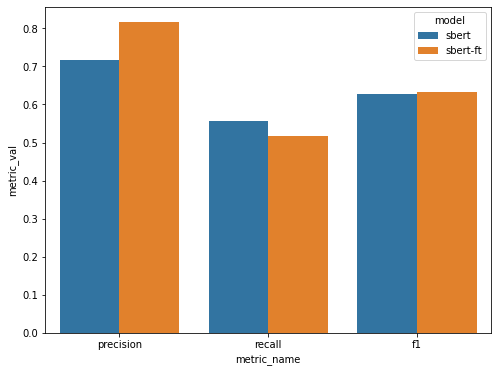

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

metric_val = [x[1] for x in precision_recall_fscore_support(sbert_test_y, sbert_preds)[:3]] + \
            [x[1] for x in precision_recall_fscore_support(sbertft_test_y, sbertft_preds)[:3]]
print(len(metric_val))
metric_name = ['precision', 'recall', 'f1', 'precision', 'recall', 'f1']
model = ['sbert', 'sbert','sbert', 'sbert-ft','sbert-ft', 'sbert-ft',]

import pandas as pd

plt.figure(figsize=(8,6))
df = pd.DataFrame({'metric_val': metric_val, 'metric_name': metric_name, 'model': model})
sns.barplot(data=df, x='metric_name', y='metric_val', hue='model', )
